# Day 1: Fundamental Statistics for Computer-Based Systems

**During this class the goal is to cover chapters from 1 to 3.4.**

Some of the next chapters will be covered in the following sessions.

## Table of Contents

### 1. Understanding the Core of Statistics

Understanding the Core of Statistics

Statistics is a fascinating field that revolves around analyzing data samples to make inferences or support claims about larger groups, known as populations. This discipline blends scientific methods, mathematics, and practical knowledge to extract meaningful insights from data.

### 1.1. Introduction to data & insights

Scientists seek insights from careful observations and experiments. These methods and careful observations allow us to establish facts and draw conclusions. It is helpful to understand how statistics fit into this process.

1. **Identify the context of a general question or problem.**
2. **Collect relevant data on the topic.**
3. **Analyze the data.**
4. **Form a conclusion from the analysis.**

Statistics is the science that helps us make decisions when we are faced with uncertainty. And, what can be more uncertain than the future? We will explore how statisticians help us to predict the future, and often, help to shape it.

Statistics is also the art of making decisions when the data are variable and numbers are uncertain. We will see that from the statistical study at hand, there are tools typically used to ask the question before the collection of data. However, throughout the rest of the book, we will explore how data are collected and analyzed to answer the questions we pose.

Statistics is a rigorous and efficient way to analyze data and draw conclusions from them. However, how we collect and analyze the data are typically up to the statistician.

### 1.2. Key Concepts in Statistics:

1. **Population**: This term refers to the entire group about which you want to draw conclusions. A population can be large, like all the residents of a city, or it can be a smaller, more specific group, such as all the trees in a particular forest.

2. **Sample**: Since it's often impractical or impossible to collect data from every member of a population, statisticians collect information from a subset of the population, known as a sample. A well-chosen sample can provide powerful insights into the population as a whole.

![](https://www.scribbr.com/wp-content/uploads/2019/09/population-vs-sample-1.png)

Understanding these fundamental concepts is crucial as we delve deeper into the world of computational statistics and data analysis.

 ## 2. Descriptive Statistics.

### 2.1 Getting Data

2.1 Getting Data

#### Understanding the Dataset

In this section, we will explore a practical and publicly available **data source** to understand patterns in childbirth. The data we will use comes from a longstanding survey conducted by the U.S. Centers for Disease Control and Prevention (CDC), called the National Survey of Family Growth (NSFG). This survey, which has been conducted since 1973, provides valuable information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men's and women's health. Such data is crucial for public health research and policy making.

#### Accessing the Data

The dataset we'll focus on is the *Female Pregnancy Data File (2002FemPreg.dat)*, which contains records for each pregnancy reported by respondents. This dataset is part of the NSFG Cycle 6 data, available for download at:

[NSFG Cycle 6 Data](http://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm#cyc6downdatafiles)

#### Dataset Breakdown

There are 13,593 pregnancies in our dataset. Each line in the file represents a single record of a pregnancy. The dataset includes the following key information:

- `case.id`: The ID of the respondent, spanning from column 1 to 12.
- `prg.length`: The duration of the pregnancy in weeks, located in columns 275 to 276.
- `outcome`: The outcome of the pregnancy (e.g., 1 = live birth), found in column 277.
- `birth.ord`: The birth order of each live birth, covered in columns 278 to 279.

This data can provide insights into various aspects of pregnancy and childbirth patterns across the population.

<small>For more information, the online documentation of the survey is available at [NSFG Survey Documentation](http://www.icpsr.umich.edu/nsfg6).</small>




### 2.2 Data Preparation

2.2 Data Preparation

#### Why Python?

One of the reasons we choose a general-purpose programming language like Python for our analysis, rather than a specialized statistics language like R, is the versatility it offers, especially in the data preparation phase. Often, the most challenging aspect of a data analysis project is not the analysis itself, but preparing the data to be analyzed.

#### Common Steps in Data Preparation

1. **Getting the Data**: This involves reading data from various sources, which could be files or even web scraping for online data.
2. **Parsing the Data**: Depending on the format (plain text, fixed columns, CSV, XML, HTML, etc.), the data needs to be parsed or processed into a usable form.
3. **Cleaning the Data**: Data is rarely perfect. It often contains incomplete records, errors, or inconsistent codes. Cleaning the data might involve strategies like removing, imputing, or otherwise handling these imperfect records.
4. **Building Data Structures**: Once cleaned and parsed, the data should be stored in structures conducive to analysis. For smaller datasets, in-memory structures like lists, dictionaries, or DataFrames are suitable. For larger datasets, a database might be necessary.

In our case, we will demonstrate these steps using Python, emphasizing the ease and flexibility it offers in handling and preparing data for analysis.

In [1]:
# --------------------------------------------------------------------------------
    # YOU DON'T NEED TO UNDERSTAND HOW TO OPEN THIS FILE, BUT I LEAVE THE CODE FOR YOU
# --------------------------------------------------------------------------------

# Function to convert a string to an integer.
# If the string is empty or contains only spaces, it returns 0.
def chr_int(a):
    if a.strip() == '':  # Check if the string is empty or spaces
        return 0
    else:
        return int(a)    # Convert the string to an integer

# Try to open the file and read its contents
try:
    # Open the file using 'with' statement for better resource management
    with open('files/2002FemPreg.dat', 'r') as file:
        preg = []  # Initialize an empty list to store the data

        # Iterate over each line in the file
        for line in file:
            try:
                # Extract specific fields from the line using string slicing
                # and convert them to integers. If slicing goes wrong, ValueError will be raised
                record = [int(line[:12]), int(line[274:276]), int(line[276]), chr_int(line[277:279])]
                preg.append(record)  # Append the processed record to the list
            except ValueError as e:  # Catch and handle ValueError
                print(f"Error processing line: {line}")
                print(f"Error message: {e}")
                # You can choose to break, continue, or pass based on your error handling preference

    # Print the first record and the total number of records for verification
    print('First record:', preg[0])
    print('The number of entries is:', len(preg))

except FileNotFoundError:  # Catch and handle the FileNotFoundError
    print("File not found. Please check the file path.")

First record: [1, 39, 1, 1]
The number of entries is: 13593


### 2.3 Importing data as a pandas DataFrame

Importing data as a pandas DataFrame

In this section, we delve into one of the most powerful features of Python for data analysis: the pandas library. Pandas provides extensive capabilities for data manipulation and analysis, one of which is the DataFrame. A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). This makes it perfect for handling complex datasets like the one we have from the NSFG.

After reading our dataset, our immediate step is to organize this raw data into a DataFrame. This process transforms the data into a structured form, enhancing both its readability and usability. We can then easily perform various operations on this data, such as grouping, summarizing, and filtering, to derive meaningful insights.

In the following Python code, we will:

1. Create a DataFrame from our list of pregnancy records.
2. Label the columns for better understanding and accessibility.
3. Display the first few records to get an initial view of the data.
4. Group and count the data based on birth order to see the distribution of first, second, third (and so on) births in the dataset.

These steps are foundational in our journey of data exploration and analysis.

In [2]:
# Importing the pandas library
import pandas as pd

# Creating a DataFrame from the 'preg' list
df = pd.DataFrame(preg)

# Assigning column names to the DataFrame for clarity
df.columns = ['caseId', 'prgLength', 'outcome', 'birthOrd']

# Displaying the first few records of the DataFrame
df.head()

# Grouping the data by 'birthOrd' (birth order) and counting the number of entries for each group
counts = df.groupby('birthOrd').size()
counts

birthOrd
0     4445
1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
dtype: int64

In [3]:
df.head()

,caseId,prgLength,outcome,birthOrd
0,1,39,1,1
1,1,39,1,2
2,2,39,1,1
3,2,39,1,2
4,2,39,1,3


In [4]:
# Printing the number of first babies and the number of babies according to their birth order
print('The number of first babies is:', counts[1])
print('Number of babies according to their order:', counts)

# Additional: Displaying the count of different outcomes
# df.outcome.value_counts()

The number of first babies is: 4413
Number of babies according to their order: birthOrd
0     4445
1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
dtype: int64


## Next, 
we'll focus on further dissecting our dataset by dividing live births into two distinct categories: first babies and other babies. This distinction is crucial for several reasons, including studying differences in pregnancy duration, health outcomes, or parental experiences between first-time and experienced mothers.

To make this distinction, we apply two filters:
1. **First Babies**: Identifying babies who are the first-born to their mothers.
2. **Other Babies**: Categorizing babies who are not the first-born, i.e., second, third, or higher birth order.

By doing this, we can conduct more targeted analyses and possibly uncover patterns unique to each group.

In [5]:
# Divide records into two lists: first babies and others

# Selecting first births where outcome is a live birth (outcome == 1) and birth order is 1 (first baby)
firstbirth = df[(df.outcome == 1) & (df.birthOrd == 1)]
print('The number of first babies is:', firstbirth.shape[0])

The number of first babies is: 4413


In [6]:
# Selecting other births where outcome is a live birth (outcome == 1) but birth order is 2 or more
othersbirth = df[(df.outcome == 1) & (df.birthOrd >= 2)]
print('The number of other babies is:', othersbirth.shape[0])

The number of other babies is: 4735


### 2.4 Data Cleaning

Data cleaning is a crucial step in the data analysis process. It involves preparing the raw data for analysis by ensuring its quality and usability. Here are some common data cleaning steps:

+ **Sample the Data**: When working with large datasets, it might be impractical to process all the data due to computational constraints. In such cases, sampling a subset of the data for analysis is a viable approach.

+ **Impute Missing Data**: It's common for datasets to have missing or erroneous fields. These can be handled by:
    - Discarding records that are incomplete.
    - Inferring missing values from other data records, such as filling in missing data with the average or median value.

+ **Normalize Numeric Values**: Normalizing involves transforming numeric data into a uniform range, making it easier to compare and analyze.

+ **Reduce Dimensionality**: High dimensionality can pose challenges for certain analysis methods. Dimensionality reduction can be achieved by:
    - Removing irrelevant input variables.
    - Eliminating redundant input variables.

+ **Add Derived Features**: Sometimes, it's beneficial to compute additional attributes from existing ones, like converting a geographical location to a ZIP code, or an age to an age group.

+ **Discretize Numeric Values into Categories**: This involves cutting continuous values into ranges and assigning them to corresponding categories. Discretization can be done using constant width (variable frequency) or variable width (constant frequency) ranges.

+ **Binarize Categorical Attributes**: For models that only accept binary or numeric inputs, categorical attributes need to be converted into multiple binary attributes, each representing a particular value of the category.

+ **Select, Combine, Aggregate Data**: The accuracy of predictive models often hinges on how well the input features are structured. This may involve combining multiple pieces of raw data, or aggregating data records along certain dimensions (e.g., clinical vs. demographic data).

!()[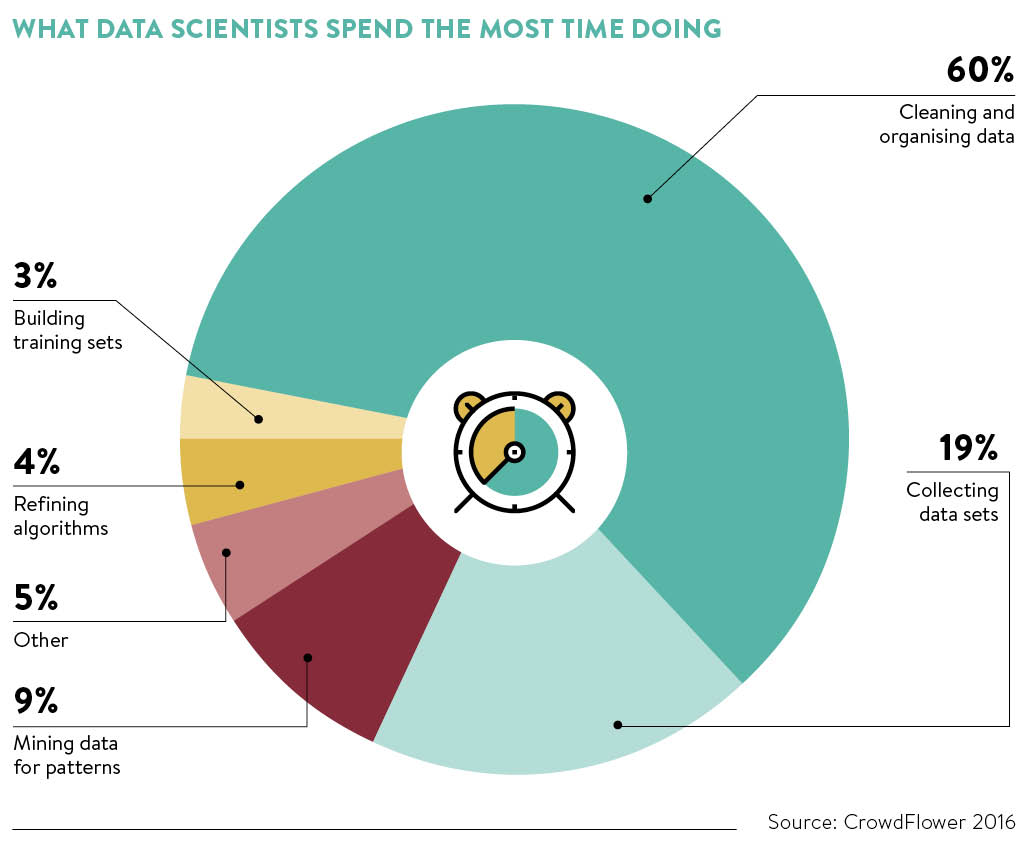]

## 3. Exploratory Data Analysis

### (Skip in class) 3.0 Intro to Statistical Exploratory Data Analysis



Exploratory Data Analysis (EDA) is a critical step in the data analysis process. It involves examining the data sets to summarize their main characteristics, often using visual methods. The goal is to understand the data, identify patterns and anomalies, and formulate hypotheses for further analysis. This chapter delves into various techniques used in EDA:

* **3.1 Summarizing the Data**: This section explores basic statistical measures like mean, median, variance, and more. These measures provide a quick overview of the data's central tendency and variability.

* **3.2 Histogram**: Histograms are graphical representations that organize a group of data points into user-specified ranges. This section focuses on understanding and creating histograms to visualize the distribution of data.

* **3.3 Data Distributions**
    * **3.3.1 PMF (Probability Mass Function)**: The PMF is useful for analyzing discrete probability distributions. It gives the probability that a discrete random variable is exactly equal to some value.
    * **3.3.2 CDF (Cumulative Distribution Function)**: The CDF is a function that shows the probability that a random variable will be less than or equal to a certain value. It's an important tool for understanding the cumulative distribution of data.

* **3.4 Outliers**: Identifying and interpreting outliers is crucial as they can significantly affect the results of the data analysis. This section discusses methods to detect outliers and their potential impact on analysis.

* **3.5 Measuring Asymmetry**
    * **3.5.1 Skewness**: Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable. This part explains how to quantify the degree of asymmetry in a data distribution.
    * **3.5.2 Pearson's Median Skewness Coefficient**: An alternative measure of distribution asymmetry, this coefficient is based on the median and the mean of the distribution.

* **3.6 Relative Risk**: This section covers the calculation and interpretation of relative risk, which is a measure used in the fields of epidemiology and statistics.

* **3.7 A First Glimpse into Conditional Probability**: Introducing the basic concepts of conditional probability, this section sets the groundwork for understanding more complex probabilistic analyses in data science.

Each section in this chapter provides tools and techniques to perform an effective exploratory analysis, laying the foundation for more advanced statistical analysis and predictive modeling.


#### Business Challenge: Exploratory Data Analysis Presentation

Business Challenge: Exploratory Data Analysis Presentation

##### Background

As a data analyst team at a leading business consultancy, your group has been tasked with performing an exploratory data analysis for a high-profile client. The client, a retail giant, is looking to understand their sales data to identify trends, prepare for the upcoming season, and make data-driven decisions to increase profitability.

##### Challenge

Your team will divide and conquer various EDA techniques to uncover insights from the client's sales data. Each team member will be responsible for mastering one technique, creating a compelling presentation, and educating the rest of the group on their findings and the relevance to the business.
Use the following dataset [Online Retail Store](https://archive.ics.uci.edu/dataset/352/online+retail)

##### Task Distribution

* **Team Member 1 - Summarizing the Data**: Focus on calculating and interpreting the mean, median, and variance. How do these measures help understand customer spending patterns?

* **Team Member 2 - Histograms**: Create histograms to visualize the distribution of sales data. Identify peak sales periods and products leading to high sales volumes.

* **Team Member 3 - Probability Distributions**:
    * **PMF Analysis**: Analyze the discrete probability distribution of sales across different store locations.
    * **CDF Analysis**: Assess the cumulative distribution to understand what percentage of stores achieve certain sales thresholds.

* **Team Member 4 - Outlier Detection**: Identify any outliers in the sales data. Investigate potential causes and discuss how outliers can impact sales forecasts and inventory planning.

* **Team Member 5 - Measuring Asymmetry**:
    * **Skewness Assessment**: Determine if the sales data is skewed towards higher or lower values and discuss implications for inventory management.
    * **Pearson's Coefficient**: Contrast skewness with Pearson's median skewness coefficient to validate findings.

* **Team Member 6 - Relative Risk**: Calculate the relative risk of stockouts during high sales periods. Provide recommendations for risk mitigation.

* **Team Member 7 - Conditional Probability**: Offer insights into the probability of high sales given specific conditions, such as holidays or promotional events.

##### Presentation Guidelines

Each team member will prepare a 5-minute presentation on their technique, showcasing visuals such as charts or tables and explaining their relevance to the business case. The presentation should conclude with strategic recommendations based on the analysis.

##### Goal

The ultimate objective is to provide the client with actionable insights that can shape their business strategy. By distributing the EDA techniques among team members, the client will benefit from a comprehensive analysis that covers various aspects of their sales data.

##### Deadline

The presentations will take in 20 minutes.Good luck, team!


In [7]:
# Build your EDA technique presentation

### 3.1 Summarizing the Data (Walk fast, quick review)

#### 3.1.0 Summarizing the data Intro


Summarizing the Data

Central tendency is a central (typical) value for a probability distribution. In the field of statistics, measures of central tendency are numerical values that summarize and describe the center point of a dataset. These measures are critical in data analysis as they provide a significant summary statistic about the data.

The three main measures of central tendency are:

- **Mean**: The arithmetic average of a set of values, obtained by summing them together and then dividing by the number of values.
- **Median**: The middle value in a dataset when the values are arranged in ascending or descending order. If there is an even number of observations, the median is the average of the two middle numbers.
- **Mode**: The most frequently occurring value in a dataset.

Each of these measures can provide different insights into the nature of the data:

- **Mean**: Offers a measure that is sensitive to every data point in the dataset, which can be both an advantage and a disadvantage, as it can be heavily influenced by outliers.
- **Median**: Provides a better measure of the central tendency when a dataset contains outliers or is skewed, as it is not affected by extreme values.
- **Mode**: Useful for categorical data to determine the most common category.

![](https://miro.medium.com/v2/resize:fit:1302/0*BicwQ6RD8k3YTByX)

Beyond the basic mean, other types of means can be used depending on the data distribution and analysis needs:

- **Trimmed Mean**: A mean computed after "trimming" a specified percentage of the smallest and largest values from the data set, which can help in reducing the effect of outliers.
- **Geometric Mean**: The nth root of the product of n numbers, which is particularly useful for data that is multiplicative in nature.
- **Harmonic Mean**: The reciprocal of the arithmetic mean of the reciprocals of the data values, often used for rates and ratios.
- **Weighted Mean**: An arithmetic mean that incorporates weighting to certain data elements, useful when certain data points contribute more to the result.

Understanding the correct application and implications of each measure is essential for accurately summarizing and interpreting data.

![](https://camilo-mora.github.io/GEO380/images/Central%20Tendency%20Measures.png)



#### 3.1.1 Sample Mean



In data analysis, understanding the central tendency of your dataset is crucial, and the **sample mean** is one of the key measures for this. (**la media de toda la vida**)

##### What is the Sample Mean?

The sample mean (often represented by $\mu$) is essentially the average of all values in your dataset. It's calculated by summing all the values and then dividing the sum by the number of observations. The formula is:

$$ \mu = \frac{1}{n} \sum_i x_i $$

Here, $x_i$ represents each individual value, and $n$ is the total number of values.

##### The Significance of the Mean

The mean is much more than just an average; it's a crucial statistic that offers a quick snapshot of your dataset. It's especially helpful for:

- **Comparing Datasets**: It allows for the comparison of the central tendencies across different datasets.
- **Trend Analysis**: The mean is invaluable for analyzing trends, particularly in time-series data.
- **Foundation for Modeling**: It forms the basis for many statistical models and machine learning algorithms.

To explore more about the mean and its applications, check out these resources:
- [Mean Explained on Khan Academy](https://www.khanacademy.org/math/statistics-probability)
- [Understanding Mean on Stat Trek](https://stattrek.com/statistics/dictionary.aspx?definition=mean)

In the next section, we'll use Python to calculate the sample mean for various variables in our birth information dataset (`df`). This will give us an insight into the general characteristics of our data.

##### Investigating Differences in Pregnancy Lengths

After calculating basic summary statistics, our next goal is to compare the pregnancy lengths between different groups within our dataset. Specifically, we're interested in determining if there's a noticeable difference in the average pregnancy length (`prgLength`) between first-time births and subsequent births. This comparison could yield insights into whether the experience of having a child previously affects the duration of later pregnancies.

##### Sample Mean Comparison

We will calculate the mean pregnancy length for two groups:

- **First Births**: Women experiencing their first childbirth.
- **Other Births**: Women who have given birth previously.

By comparing these two means, we can start to explore our hypothesis about differences in pregnancy lengths based on birth order.

##### Considerations

It's important to distinguish between the *sample mean* and the *population mean*:
- The **sample mean** is the average of a subset (a sample) taken from the population.
- The **population mean** is the average of the entire population.

Our analysis focuses on the sample mean because we're working with a sample of data from the broader population of all births.

In [8]:
# Calculate and print the mean pregnancy length for first births
mean_firstbirth = firstbirth['prgLength'].mean()
print('The mean of the first birth is:', mean_firstbirth, 'weeks')

The mean of the first birth is: 38.60095173351461 weeks


In [9]:
# Calculate and print the mean pregnancy length for non-first births
mean_othersbirth = othersbirth['prgLength'].mean()
print('The mean of the non first birth is:', mean_othersbirth, 'weeks')

The mean of the non first birth is: 38.52291446673706 weeks


In [10]:
# Calculate and print the absolute difference in means
mean_diff = abs(mean_firstbirth - mean_othersbirth)
print('The difference in time is:', mean_diff, "weeks")

The difference in time is: 0.07803726677754952 weeks


In [11]:
# Express the difference in days
print('The difference in time is:', mean_diff * 7, "days")

The difference in time is: 0.5462608674428466 days


In [12]:
# Express the difference in hours
print('The difference in time is:', mean_diff * 7 * 24, "hours")

The difference in time is: 13.11026081862832 hours


##### Now Interpret the result, do you think is relevant?

In [13]:
# write here your opinion

#### 3.1.2 Sample Variance and Standard deviation



When we talk about data, just knowing the average (the mean) doesn't give us the full story. Imagine you're looking at the average heights of two basketball teams, and they're both the same. Does this mean all players on both teams are of the same height? Not necessarily. Some players could be taller, and others shorter, which is where **variance** and **standard deviation** come into the picture.

![](https://www.researchgate.net/publication/284726282/figure/fig1/AS:300344581083136@1448619136013/Figure-B2-In-this-scenario-two-sample-distributions-have-identical-means-but.png)

##### What is Variance?

Think of **variance** as a way to measure how "spread out" the numbers in your data are. It's like looking at a flock of birds: Are they flying closely together, or is there a lot of space between them? Variance is represented by the symbol $\sigma^2$ and is calculated with the formula:

$$ \sigma^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

- Each $x_i$ is a data point — like the height of each basketball player.
- The symbol $\mu$ stands for the mean height of all the players.
- The expression $(x_i - \mu)$ is called the *deviation from the mean* — it's how much taller or shorter each player is from the average height.
- We square each deviation so that we're only dealing with positive numbers (since direction doesn't matter here, just the distance).
- And then we find the mean of these squared deviations to get the variance.

##### Why Use Standard Deviation?

While variance tells us how spread out our data is, it does so in "squared units." If we're measuring height in meters, variance gives us meters squared, which isn't very intuitive. That's why we introduce **standard deviation** ($\sigma$), which is the square root of the variance:

$$ \sigma = \sqrt{\sigma^2} $$

Now we're back to regular units — like meters for height — making it much easier to understand. If the standard deviation is small, it means the heights of the basketball players are close to the average. If it's large, the players' heights vary a lot. But what does it tell us exactly?

In a perfectly *normal distribution* (which is a specific way to describe data that's symmetrically distributed), we can use the standard deviation to determine the proportion of data that falls within certain ranges:

- Approximately 68% of the data falls within one standard deviation of the mean.
- Around 95% of the data falls within two standard deviations of the mean.
- About 99.7% of the data falls within three standard deviations of the mean.

These ranges are known as the Empirical Rule or the 68-95-99.7 (three-sigma) rule. (This is a must know during interviews on data analysis/ data science positions)

Example: Imagine you're a teacher looking at the spread of scores on a test. If the distribution of scores is roughly normal and the standard deviation is 10 points, you can expect that about 68% of your students scored within 10 points above or below the average score. If one student scored two standard deviations above the average, they would be among the top 5% of scores.

It's important to note that the Empirical Rule only strictly applies to normal distributions, which not all datasets are. Our data might be skewed or follow a different distribution, so we can't always apply these exact percentages. However, standard deviation still offers valuable insight into the variability of the data.

##### In the Classroom and Beyond

Understanding the spread of data is just as crucial as the average when it comes to making decisions based on data. For instance, if a teacher is looking at the spread of test scores, a small standard deviation would mean most students scored around the same mark. A large standard deviation could indicate that some students scored much higher or lower than the class average.

Armed with the knowledge of both the mean and standard deviation, we can get a comprehensive picture of our data — whether we're comparing the heights of basketball players, analyzing test scores, or exploring the duration of pregnancies, as we will do next with our dataset.

In [14]:
# Calculate the mean (average) pregnancy length for first births
mu1 = firstbirth['prgLength'].mean()

In [15]:
# Calculate the mean (average) pregnancy length for other births
mu2 = othersbirth['prgLength'].mean()

In [16]:
# Calculate the variance of pregnancy length for first births
# Variance measures how widely the pregnancy lengths are spread around the mean
var1 = firstbirth['prgLength'].var()

In [17]:
# Calculate the variance of pregnancy length for other births
var2 = othersbirth['prgLength'].var()

In [18]:
# Calculate the standard deviation of pregnancy length for first births
# Standard deviation is the square root of variance and gives a sense of the spread
# of pregnancy lengths around the mean in the original units of measurement
std1 = firstbirth['prgLength'].std()

In [19]:
# Calculate the standard deviation of pregnancy length for other births
std2 = othersbirth['prgLength'].std()

In [20]:
# Print out the mean, variance, and standard deviation for first births
print('First births - Mean (mu1):', mu1, 'Variance (var1):', var1, 'Standard Deviation (std1):', std1)

# Print out the mean, variance, and standard deviation for other births
print('Other births - Mean (mu2):', mu2, 'Variance (var2):', var2, 'Standard Deviation (std2):', std2)

First births - Mean (mu1): 38.60095173351461 Variance (var1): 7.794713509229203 Standard Deviation (std1): 2.7919014146687204
Other births - Mean (mu2): 38.52291446673706 Variance (var2): 6.842683519298484 Standard Deviation (std2): 2.6158523504392375


#### 3.1.3 Understanding the Sample Median

In statistics, the **median** is the number that sits right in the middle of our ordered sample. If you line up all your data points from smallest to largest, the median is the one that divides the line so that half of the values are on one side and the other half on the other side. It's like the middle marker in a race – it tells you how the 'runners' (or data points) are spread out. 

The median is especially useful because it's not swayed by outliers. For example, if you're looking at the wealth in a neighborhood, a single billionaire could skew the average, but the median would still give you a good idea of what the typical income looks like.

In [21]:
# Calculate the median pregnancy length for first births
# The median is the middle value when all observations are ordered from lowest to highest
firstbirthmedian = firstbirth['prgLength'].median()

# Calculate the median pregnancy length for other births
# If there is an odd number of observations, the median is the middle number
# If there is an even number of observations, the median is the average of the two middle numbers
othersbirthmedian = othersbirth['prgLength'].median()

In [22]:
# Print the median pregnancy lengths for both first births and other births
# The median is less affected by outliers and skewed data than the mean
print('The median pregnancy length for first births is:', firstbirthmedian, 'weeks')
print('The median pregnancy length for other births is:', othersbirthmedian, 'weeks')

# Comparing the medians can give us insights into the differences between the two groups
# A significant difference in medians may suggest differing distributions of pregnancy lengths

The median pregnancy length for first births is: 39.0 weeks
The median pregnancy length for other births is: 39.0 weeks


#### 3.1.4 Diving Into Quantiles and Percentiles



When we want to explore our data even further, we use **quantiles** and **percentiles**. These are points in your data that split it into groups of equal size. 

For instance, if you're standing in line at the movies, the 25th percentile is the spot in line where 25% of people are in front of you and the rest are behind. In your data, you order all your points and find the value that splits off the bottom 25%. That's your first quantile, also known as the first quartile or $Q_1$.

Similarly, the 50th percentile cuts your data in half – and guess what? That's also your median! Then there's the 75th percentile, or $Q_3$, where 75% of your data falls below it.

![Illustration of mean and median](images/mean_median.gif)




#### The 5-Number Summary


To get a quick snapshot of our data, we use the **5-number summary**: this includes the minimum value ($x_{min}$), first quartile ($Q_1$), median ($Q_2$), third quartile ($Q_3$), and the maximum value ($x_{max}$). It's like a mini-map that shows you all the key points in your data at a glance.

Let's apply these concepts to our dataset to see how the pregnancy lengths are distributed for first-time births versus others. We'll calculate the median and quantiles to get a deeper understanding of the data's spread and to check for any signs of significant differences between the groups.

#### 3.2 Histograms

Histograms

When it comes to visualizing data distributions, **histograms** are one of the most popular and powerful tools in a data analyst's toolkit. A histogram is essentially a bar graph, but instead of each bar representing a category, it represents a range of data. Let's dive deeper into understanding histograms and why they're so useful.

#### What is a Histogram?

A [histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) displays the frequency of different values in a dataset. Each bar in a histogram represents the frequency (or count) of data points within a specific range of values, known as a bin or bucket. For example, in a histogram of test scores, one bar might represent the number of students who scored between 80 and 89.

![](https://es.mathworks.com/help/stats/histogramwithanormaldistributionfitexample_01_es.png)

#### Quick Insights from Histograms

Histograms are incredibly useful for quickly getting a sense of the following aspects of your data:

- **Distribution Shape**: You can see whether the data is skewed (leaning to one side), bimodal (having two peaks), or normal (bell-shaped).
- **Central Tendency**: While it doesn't show the mean or median directly, the shape of the histogram can give you a good idea of where the bulk of your data lies.
- **Spread of Data**: The width of the histogram shows the range of your data, and the spread of the bars indicates where the data is concentrated.
- **Outliers and Gaps**: Unusually high bars or gaps in the histogram might suggest outliers or anomalies in your data.

#### Advantages of Using Histograms

- **Simplicity and Clarity**: Histograms provide a straightforward visual summary of data, making them easy to understand at a glance.
- **Versatility**: They can be used for a wide range of data types and are particularly good for showing the shape of your data distribution.
- **Identifying Patterns**: Histograms make it easier to identify patterns, trends, and potential outliers that might warrant further investigation.

#### In Practice

Let's say you're analyzing customer spending. A histogram of transaction amounts can quickly show you the most common spending range, any unusual spending patterns, and whether there are any unusually high or low transactions.

In the next section, we'll create histograms for our birth information dataset. This will help us visually assess the distribution of pregnancy lengths and identify any notable characteristics or patterns.

#### Remember:

While histograms are a fantastic tool for a quick data overview, they don't give precise numerical information like the mean or median. They are best used as a starting point for deeper data exploration.

In [23]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

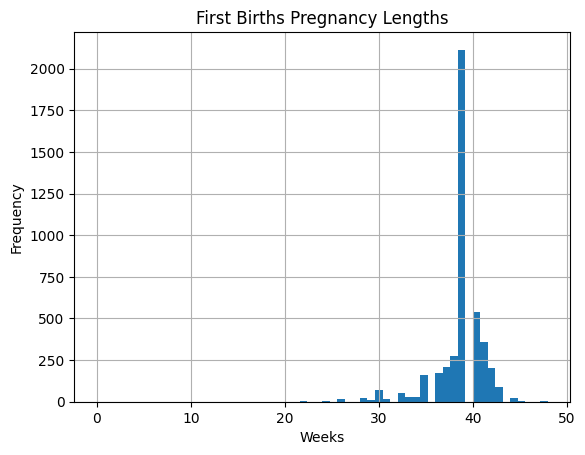

In [24]:
# Extract the 'prgLength' column for first births
fb = firstbirth['prgLength']

# Plot a histogram for first births
# 'bins=30' splits the data into 30 bins for more granularity
fb.hist(bins=60)
plt.title('First Births Pregnancy Lengths')
plt.xlabel('Weeks')
plt.ylabel('Frequency')
plt.show()

#### Interpreting the Histogram of First Births Pregnancy Lengths

The histogram we've generated represents the distribution of pregnancy lengths for first births. Here's how to read and interpret this visual data representation.

#### Peaks and Valleys

- **Central Peak**: The tallest bar in the histogram occurs at around 39 weeks. This peak suggests that the most common pregnancy length for first births is close to 39 weeks.
- **Valleys**: The areas where the bars are lower indicate less frequent pregnancy lengths.

#### Spread of Data

- **Range**: The horizontal axis shows the length of pregnancies in weeks. This particular histogram ranges from approximately 0 to 50 weeks, which covers the entire span of typical pregnancy lengths.
- **Concentration**: Most of the data is clustered around the central peak, with fewer occurrences toward the tails (the far left and right of the histogram).

#### Interpretation Tips

- **Mode**: The mode of this data — the most frequently occurring pregnancy length — is indicated by the height of the central peak.
- **Skewness**: If one tail is longer than the other, the data is skewed. In this histogram, there's a slight skew towards lower values, indicating some pregnancies are shorter than the mode.
- **Outliers**: Any bars separated from the main group could indicate outliers. For instance, the bars to the far right might represent unusually long pregnancies.

#### What This Tells Us

By looking at the shape and spread of the histogram, we can infer that most first births happen around the 39-week mark. However, there is


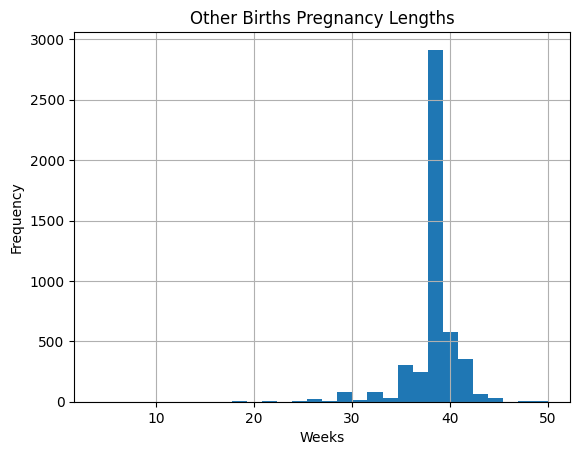

In [25]:
# Extract the 'prgLength' column for other births
ob = othersbirth['prgLength']

# Plot a histogram for other births
# 'density=0' ensures the histogram shows counts and not a probability density
ob.hist(density=0, bins=30)
plt.title('Other Births Pregnancy Lengths')
plt.xlabel('Weeks')
plt.ylabel('Frequency')
plt.show()

#### Interpreting the Histogram for Other Births Pregnancy Lengths

We've created a histogram to visualize the distribution of pregnancy lengths for births that are not first-time occurrences — referred to here as 'Other Births'.

##### Key Observations

- **Central Peak**: The histogram shows a strong central peak at around the 39-week mark. This suggests that, similar to first births, the most common length of pregnancy for subsequent births hovers around 39 weeks.
- **Frequency**: The height of the peak indicates the frequency. In this case, a significant number of 'Other Births' also occurred around this gestation period.
- **Comparison with First Births**: When compared with the histogram for first births, we can look for similarities and differences in the distributions. Does the same peak around 39 weeks hold? Are there more or fewer births at different gestation periods?

##### Understanding the Distribution

- **Skewness and Spread**: Like the first births histogram, we can examine the skewness — is there a longer tail to the left or right of the peak? Also, the spread of the histogram (how wide it is) can indicate the variability in gestation length for other births.
- **Outliers and Gaps**: Are there any bars that stand apart from the rest, indicating unusually short or long pregnancies? These could be outliers that may warrant special attention.

##### Practical Insights

Histograms like this one are particularly useful for healthcare providers to prepare for the most common scenarios while also planning for less common situations. For example, the peak around 39 weeks tells us when hospitals might expect the highest number of births and plan their staffing and resources accordingly.

##### Conclusion

By comparing the histogram of 'Other Births' to that of 'First Births', we can start to draw conclusions about how birth order might influence pregnancy length. We also gain valuable insights into the general health and trends within the population being studied.

Remember to replace `path-to-histogram-image` with the actual path to your histogram image so that students can see the visual representation that accompanies this interpretation.


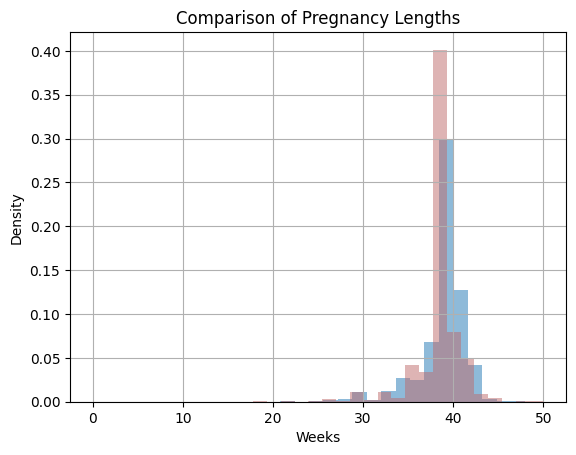

In [26]:
# Plot histograms for both first births and other births on the same graph for comparison
# 'alpha' is set for transparency so both histograms are visible
fb.hist(density=True, bins=30, alpha=0.5)   # First births histogram
ob.hist(density=True, bins=30, alpha=0.5, color=sns.desaturate("indianred", 0.75))  # Other births histogram
plt.title('Comparison of Pregnancy Lengths')
plt.xlabel('Weeks')
plt.ylabel('Density')
plt.show()

#### Analyzing Overlaid Histograms for Pregnancy Lengths

The overlaid histogram we're looking at provides a visual comparison between the pregnancy lengths for first-time births (in blue) and other births (in pink). This kind of graph is a powerful tool for directly comparing two distributions.

##### How to Read the Overlaid Histogram

- **Dual Peaks**: Each color represents a different group. The blue bars are for first births, and the pink bars are for subsequent births. Where the bars overlap, they blend to create a purple shade.
- **Height of Bars**: The height indicates the density of observations within each bin. A taller bar means more occurrences of pregnancies with lengths within that specific range of weeks.
- **Width of Bins**: Each bin covers a range of one week. The width of the bins is consistent across the histogram, allowing for a straightforward comparison between the two groups.

##### Insights from the Histogram

- **Comparison of Central Tendencies**: Both distributions have their peaks around the same place, close to the 39-week mark, indicating similar median pregnancy lengths.
- **Overlap Areas**: The areas where the colors blend indicate a significant overlap in the data, reinforcing the similarity between the two groups.
- **Distribution Shape**: By comparing the spread and skewness of the two histograms, we can comment on the variability and distribution shape of pregnancy lengths for both groups.

##### What Can We Infer?

- **Similarities**: The central weeks show a high degree of overlap, suggesting that the lengths of pregnancies are not drastically different for first-time and experienced mothers.
- **Differences in Spread**: If one distribution is noticeably wider than the other, it could indicate a greater variability in pregnancy length for that group.

##### Conclusion

This visual comparison helps us quickly grasp the similarities and differences between the two groups. While there are individual variances, the general pattern of pregnancy lengths appears consistent, with most falling into the typical gestation period.

Remember to replace `path-to-histogram-image` with the actual path to your histogram image. This explanation will help students understand how to compare two sets of data and what conclusions might be drawn from such a comparison.


In [27]:
# Using scipy.stats to compute and print descriptive statistics for first births
# This includes count, mean, variance, min, max, skewness, and kurtosis
print('First Births Statistics: ', stats.describe(fb.values))

# Computing and printing descriptive statistics for other births
print('Other Births Statistics: ', stats.describe(ob.values))

First Births Statistics:  DescribeResult(nobs=4413, minmax=(0, 48), mean=38.60095173351461, variance=7.794713509229203, skewness=-2.5904758400585424, kurtosis=15.132902638550163)
Other Births Statistics:  DescribeResult(nobs=4735, minmax=(4, 50), mean=38.52291446673706, variance=6.842683519298485, skewness=-3.1536063733026825, kurtosis=20.77720107598575)


### 3.3 (Slides first) Data Distributions

Data Distributions

When we summarize data with statistics like the mean or median, we get a snapshot of our dataset. However, this approach has its limits because vastly different data can have identical summary statistics. That's why it's crucial to validate our summaries by examining the data more closely. One way to do this is by looking at the data distribution.

#### What is Data Distribution?

Data distribution refers to the way data values are spread across the range of possible values. It gives us a visual representation, often in the form of a graph, showing how frequently each value appears, known as its frequency.

#### Why Look at Data Distributions?

- **Detect Patterns**: Distribution graphs can reveal patterns that aren't obvious from summary statistics alone.
- **Spot Anomalies**: They help in identifying outliers or unusual gaps in data.
- **Understand Spread**: Distributions show us the variability or spread of the data, giving context to the mean and median we calculate.

#### From Histograms to Probability Mass Functions (PMF)

We can take the concept of a histogram a step further by converting it into a **Probability Mass Function (PMF)**. A PMF is simply a normalized version of a histogram where each frequency count is divided by the total number of observations, $n$. This gives us a probability for each value.

##### Creating a PMF:

1. **Start with a Histogram**: Count how many times each value appears.
2. **Normalize**: Divide the counts by the total number of values to get probabilities.
3. **Result**: The resulting graph shows the probability of each value within your dataset.

The PMF is particularly useful because it allows us to compare different distributions and make probabilistic statements. For example, we can answer questions like, "What's the probability that a randomly chosen birth is a first birth?"

#### Application in Analysis

By understanding the PMF, we can better interpret the likelihood of different outcomes in our data. If we're looking at pregnancy lengths, the PMF can tell us not just the most common length (as the mode would) but also how likely other lengths are relative to that mode.

In the following sections, we'll create and analyze PMFs for our dataset to gain deeper insights into the distribution of pregnancy lengths for first-time and other births.

In [28]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

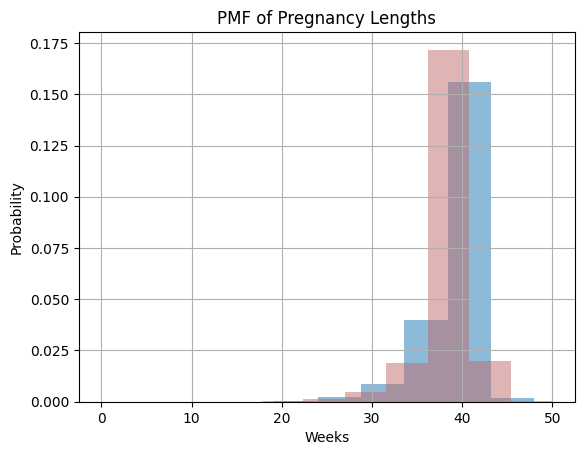

In [29]:
# Plot normalized histograms (PMFs) for both first births and other births
# The 'density=True' parameter normalizes the data to form a probability density (PMF)
# The 'alpha' parameter sets the transparency of the histogram bars
fb.hist(density=True, alpha=0.5)  # First births histogram
ob.hist(density=True, alpha=0.5, color=sns.desaturate("indianred", 0.75))  # Other births histogram
plt.title('PMF of Pregnancy Lengths')
plt.xlabel('Weeks')
plt.ylabel('Probability')
plt.show()

#### Understanding PMF and CDF

When we analyze data, two fundamental concepts that describe the distribution are the Probability Mass Function (PMF) and the Cumulative Distribution Function (CDF). These functions help us understand the nature of our data and make predictions based on it.

##### What is PMF?

The **Probability Mass Function (PMF)** applies to discrete random variables and is used to describe the probability that a random variable is exactly equal to a certain value. For example, in a dice roll, the PMF would tell us the probability of rolling a two or a five.

- **Discrete Data**: PMF is only used for discrete data where outcomes are distinct and countable.
- **Probability**: The PMF assigns a probability to each possible outcome.
- **Sum to One**: The sum of all probabilities in a PMF is equal to 1.

##### What is CDF?

The **Cumulative Distribution Function (CDF)**, on the other hand, is a broader concept that applies to both discrete and continuous random variables. It gives us the probability that a random variable will be less than or equal to a certain value. It accumulates the probabilities of a PMF or Probability Density Function (PDF) for continuous variables.

- **Accumulating Probabilities**: The CDF adds up (or "accumulates") the probabilities of the variable being less than or equal to a certain value.
- **Range from Zero to One**: A CDF starts at 0 and increases up to 1 as you move along the axis of possible values.
- **Applicable to All Data Types**: Whether your data is discrete or continuous, you can use a CDF to describe it.

##### PMF vs. CDF

- **Granularity**: PMF gives the probability for specific, distinct outcomes, while CDF provides the probability up to and including a certain value, which can be any number in the variable's range.
- **Visualization**: On a graph, a PMF is represented by bars (since it applies to discrete data), whereas a CDF is a curve that starts at 0 and gradually increases to 1.
- **Use Cases**: PMF is useful when you're interested in the probability of specific outcomes, like the number of heads in coin flips. CDF is helpful when you're concerned with "up to" questions, like the probability of a task being completed within a certain time frame.

By understanding both PMF and CDF, we gain a comprehensive picture of our data's distribution. PMF tells us about specific probabilities, while CDF gives us a running total of probabilities, showing us the probability of falling within a certain range.

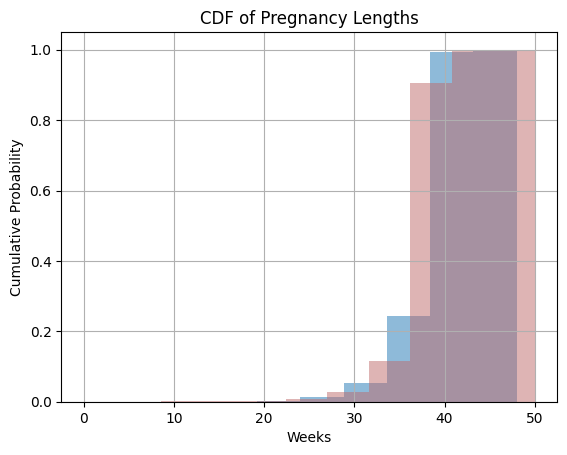

In [30]:
# Plot cumulative distribution functions (CDFs) for both groups
# The 'cumulative=True' parameter creates the cumulative plot, which shows the CDF
# The 'linewidth' parameter sets the width of the histogram outline
fb.hist(density=True, cumulative=True, alpha=0.5, linewidth=3.5)  # First births CDF
ob.hist(density=True, cumulative=True, alpha=0.5, linewidth=3.5, color=sns.desaturate("indianred", 0.75))  # Other births CDF
plt.title('CDF of Pregnancy Lengths')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Probability')
plt.show()

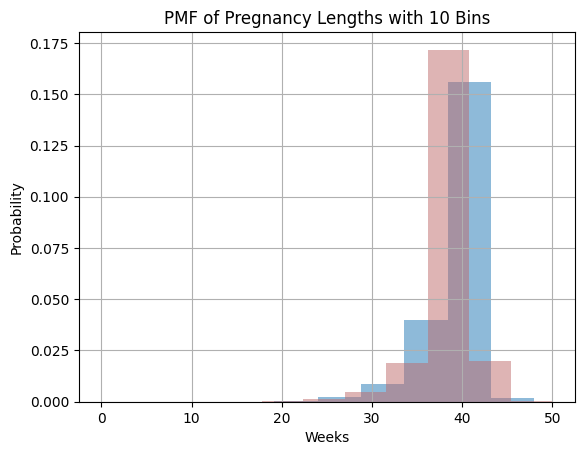

In [31]:
# Explore the effect of different bin sizes on the PMF
# Here we use 10 bins to show a less granular view of the data distribution
fb.hist(bins=10, density=True, alpha=0.5)  # First births with 10 bins
ob.hist(bins=10, density=True, alpha=0.5, color=sns.desaturate("indianred", 0.75))  # Other births with 10 bins
plt.title('PMF of Pregnancy Lengths with 10 Bins')
plt.xlabel('Weeks')
plt.ylabel('Probability')
plt.show()

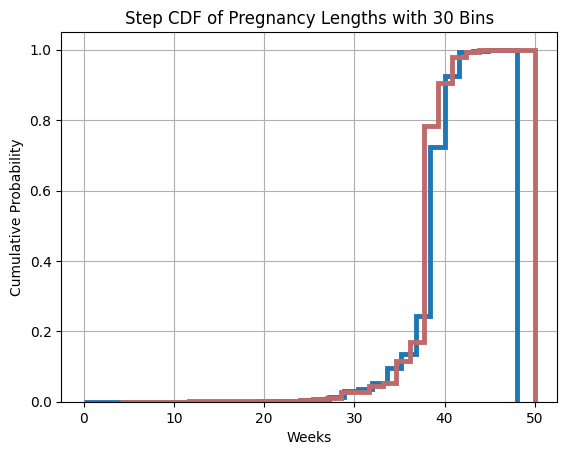

In [32]:
# Plot step CDFs with 30 bins for a more granular view
# The 'histtype' parameter set to 'step' creates a line plot for the histogram
fb.hist(density=True, histtype='step', cumulative=True, linewidth=3.5, bins=30)
ob.hist(density=True, histtype='step', cumulative=True, linewidth=3.5, bins=30, color=sns.desaturate("indianred", 0.75))
plt.title('Step CDF of Pregnancy Lengths with 30 Bins')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Probability')
plt.show()

# The output of these histograms should give students a clear visual understanding of the
# distribution of pregnancy lengths and how they accumulate over the range of data.
# By adjusting the 'bins' parameter, we can see how granularity affects the interpretation
# of the PMF and CDF. Fewer bins provide a broader overview, while more bins offer more detail.

### 3.4 Outliers

Outliers are data points that stand out significantly from the rest of the data. These unusual points are important because they can strongly influence the results of your analysis. Here, we'll explore what outliers are, how they impact your data, and the challenging task of managing them.

![](https://miro.medium.com/v2/resize:fit:697/1*O3lOgPwuHP7Vfc1T6NDRrQ.png)

#### What are Outliers?

Outliers occur for various reasons:

- **Measurement or Input Error**: These are often due to mistakes in data collection, such as errors in data entry or faulty measurements.

- **Data Processing Error**: Errors can also arise during the processing or manipulation of data.

- **Sampling Variability**: Sometimes, the natural variation in data can produce extreme values, especially in small samples.

- **True Variability in Data**: In certain cases, outliers are actual, significantly different values in the dataset.

#### Identifying Outliers

Two common methods to identify outliers are:

1. **Deviation from the Median**: Observations far from the median are potential outliers, as the median is more robust to extreme values than the mean.

2. **Standard Deviation Method**: Observations more than 2 or 3 standard deviations from the mean are often considered outliers. This approach assumes a normal distribution of data.

#### The Impact of Outliers

Outliers can significantly affect your data analysis:

- **Statistical Measures**: They can skew measures like the mean and standard deviation.

- **Model Accuracy**: In predictive models, outliers can lead to poor performance due to overfitting or underfitting.

- **Data Insights**: They can also provide valuable insights, indicating special cases or errors.

#### The Challenge of Handling Outliers

Dealing with outliers is not straightforward and depends heavily on the context and goals of your analysis:

- **Understanding the Cause**: It's crucial to understand why an outlier exists - is it an error, or does it represent a meaningful variation in the data?

- **No Standard Approach**: There's no one-size-fits-all method for handling outliers. In some cases, removing outliers is appropriate, while in others, adjusting them or keeping them can be more informative.

- **Impact on Analysis**: The decision to remove or adjust outliers should be made carefully, as it can significantly alter the results of the analysis.

Remember, handling outliers is as much an art as it is a science. It requires careful consideration and a thorough understanding of your data.

[Interesting article about outliers](https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/)


#### Managing Outliers

Handling outliers is a nuanced task. The approach depends on the nature of the data and the specific analytical goals:

1. **Assessment**: Determine whether the outlier is due to error or

<Axes: >

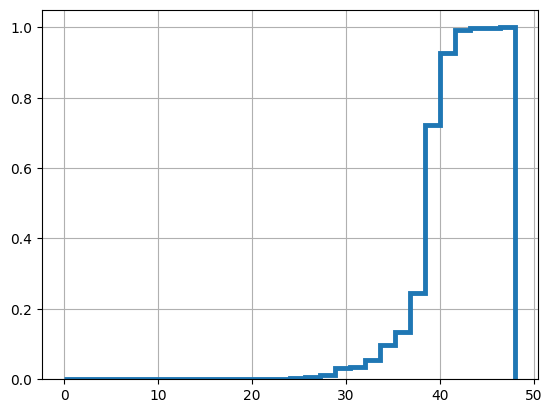

In [33]:
# This line creates a cumulative histogram, which is useful for understanding the distribution of these unusually first bort babies.
# The 'density=True' parameter ensures the histogram represents probability density.
fb.hist(density=True, histtype='step', cumulative=True, linewidth=3.5, bins=30)

#### Analyzing Outliers in Pregnancy Length

The graph above is a cumulative histogram of pregnancy lengths that are notably shorter than the median. This visual tool is instrumental for understanding how many pregnancies fall into the category of being unusually short, which could be considered outliers.

##### Key Features of the Cumulative Histogram:

- **X-Axis (Pregnancy Length)**: Represents the length of pregnancies in weeks. It is the variable we are analyzing for outliers.
  
- **Y-Axis (Cumulative Proportion)**: Indicates the cumulative proportion of pregnancies up to a certain length. For instance, at point 30 on the x-axis, the y-axis shows the proportion of pregnancies that are 30 weeks long or shorter.

- **Stepped Line**: Unlike a typical bar histogram, this plot uses a stepped line, which clearly demarcates the proportion of cases at each length.

##### Insights from the Histogram:

- **Identifying Outliers**: By observing where the line steeply increases, we can identify the range of pregnancy lengths that are most uncommon – the potential outliers. In the context of the dataset, pregnancies that are significantly shorter than the median by more than 10 weeks are rare, and thus, they stand out in our analysis.

- **Understanding Distribution**: The cumulative nature of the histogram helps us understand not just individual outliers, but also the overall distribution of the shorter pregnancy lengths.

##### Importance for Outlier Analysis:

This histogram is a powerful way to visualize and communicate the concept of outliers. It doesn't just show us isolated data points; it provides a broader view of how many and how extreme the outliers are relative to typical data points. For students of data analysis, understanding this graph is essential for interpreting outlier data and making informed decisions about how to handle them in statistical analysis.

<Axes: >

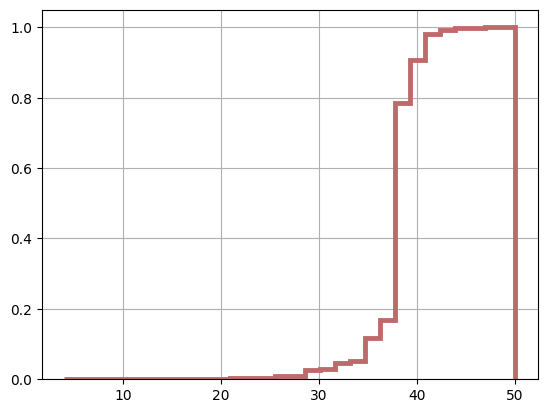

In [34]:
# This line creates a cumulative histogram for this subset, similar to the previous line, but for other babies.
# The color is set to a desaturated red for distinction in the plot.
ob.hist(density=True, histtype='step', cumulative=True, linewidth=3.5, bins=30, color=sns.desaturate("indianred", .75))

In [35]:
# Filtering the DataFrame to identify unusually long pregnancies:
# This time, we select records of live births where the pregnancy length is 
# more than 6 weeks longer than the median. These are also potential outliers.
long_pregnancies = df[(df.outcome == 1) & (df['prgLength'] > df['prgLength'].median() + 6)]

In [36]:
# Filtering the DataFrame to identify pregnancies that are unusually short:
# We select records where the outcome is '1' (live birth) and the pregnancy length is
# more than 10 weeks shorter than the median pregnancy length. These cases are potential outliers.
short_pregnancies = df[(df.outcome == 1) & (df['prgLength'] < df['prgLength'].median() - 10)]

![](https://miro.medium.com/v2/resize:fit:1348/1*4G0913txXERfABjQi3Ho2w.png)

In data analysis, we often encounter outliers that can skew our results. There are several methods to treat these outliers, each with its own advantages and considerations:

1. **Trimming**: This technique involves cutting off the most extreme values from your dataset. It's useful when you suspect that these values are errors or may disproportionately affect the results. While trimming can lead to a more robust analysis, it also reduces the dataset's size, which might not be desirable in every situation.

2. **Capping (Winsorizing)**: Capping involves setting a threshold at a certain percentile for the highest and lowest data points and capping values beyond this threshold. For instance, any values above the 95th percentile are set to the value at the 95th percentile. This method preserves the dataset size and prevents the most extreme outliers from having an undue influence on the analysis.

3. **Discretization**: This method transforms continuous data into discrete bins or categories. By grouping data into intervals, discretization can simplify analysis and make patterns more apparent. However, this can also lead to a loss of nuanced information and reduce the granularity of the data.

Each method has its own applications and should be chosen based on the specific context and goals of your analysis.


In [37]:
df2 = df.drop(df.index[(df.outcome == 1) & 
                       (df['prgLength'] > df['prgLength'].median() + 6)])

df3 = df2.drop(df2.index[(df2.outcome == 1) & 
                         (df2['prgLength'] < df2['prgLength'].median() - 10)])

In [38]:
fb3 = df3[(df3.outcome == 1) & (df3.birthOrd == 1)]

mu3fb = fb3['prgLength'].mean()
std3fb = fb3['prgLength'].std()
md3fb = fb3['prgLength'].median()

print('Before outliers removing: ', mu1, std1, firstbirthmedian, 
          firstbirth['prgLength'].min(), firstbirth['prgLength'].max())
print('After outliers removing: ', mu3fb, std3fb, md3fb, 
          fb3['prgLength'].min(),fb3['prgLength'].max())

Before outliers removing:  38.60095173351461 2.7919014146687204 39.0 0 48
After outliers removing:  38.76212364973569 2.3071502039935954 39.0 29 45


In [39]:
ob3 = df3[(df3.outcome == 1) & (df3.birthOrd >= 2)]

mu3ob = ob3['prgLength'].mean()
std3ob = ob3['prgLength'].std()
md3ob = ob3['prgLength'].median()

print('Before outliers removing: ', mu2, std2, othersbirthmedian, 
          othersbirth['prgLength'].min(),othersbirth['prgLength'].max())

print('After outliers removing: ', mu3ob, std3ob, md3ob, 
          ob3['prgLength'].min(), ob3['prgLength'].max())

Before outliers removing:  38.52291446673706 2.6158523504392375 39.0 4 50
After outliers removing:  38.658192693868834 2.095126024308069 39.0 29 45


##### (Extra Not for class)

<Axes: >

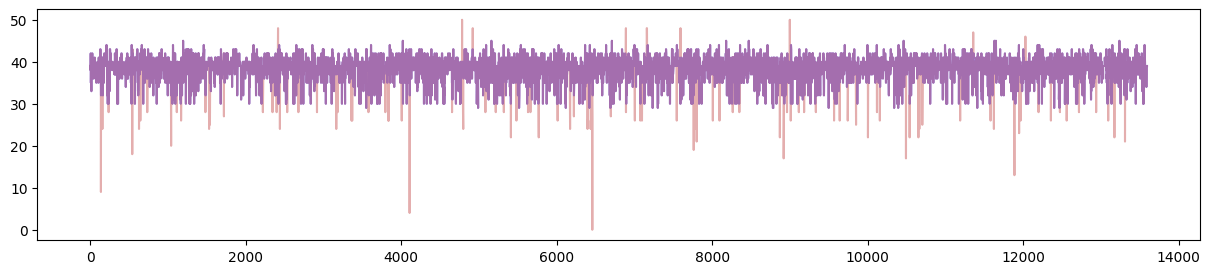

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,3))

df3.prgLength[(df3.outcome == 1)].plot(alpha=.5, color='blue')
df.prgLength[(df.outcome == 1)].plot(alpha=.5, 
                            color=sns.desaturate("indianred", .95))


Let's see what is happening near the mode:

In [41]:
import numpy as np

countfb,divisionfb = np.histogram(fb3['prgLength']) #what is the difference with hist()?!
countob,divisionob = np.histogram(ob3['prgLength'])
print (countfb-countob)


[   5   -2    7    5   23 -102 -509  133  108    2]


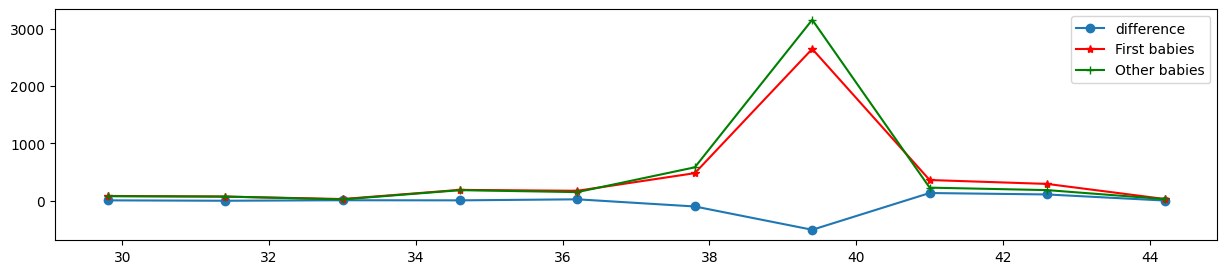

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,3))
val = [(divisionfb[i]+divisionfb[i+1])/2 for i in range(len(divisionfb)-1)]
plt.plot(val, countfb-countob, 'o-', label='difference') 
plt.plot(val, countfb, 'r*-', label='First babies') 
plt.plot(val, countob, 'g+-', label='Other babies') 
plt.legend()

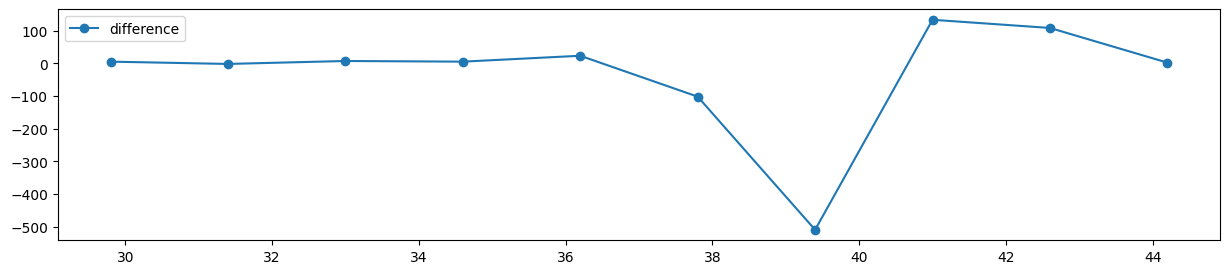

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,3))
val = [(divisionfb[i]+divisionfb[i+1])/2 for i in range(len(divisionfb)-1)]
plt.plot(val, countfb-countob, 'o-', label='difference') 
plt.legend()

#### There is still some evidence for our hypothesis!

### 3.5 Measuring Asymmetry

Measuring Asymmetry

When examining the shape of a distribution, one of the things we look for is whether it's symmetrical or skewed. This aspect of the distribution is measured by a statistic called **skewness**.

![](https://cdn.corporatefinanceinstitute.com/assets/skewness2.png)

#### Understanding Skewness

Skewness quantifies how asymmetrical the distribution of a set of data is. Mathematically, it's expressed as:

$$ g_1 = \frac{m_3}{s^3} = \frac{\frac{1}{n} \sum_i (x_i - \mu)^3 }{\left[\frac{1}{n-1} \sum_i (x_i - \mu)^2\right]^{\frac{3}{2}}} $$

In this formula:
- $m_3$ is the third central moment, which is the mean cubed deviation (how much each data point differs from the mean, cubed).
- $s$ is the standard deviation, which is the square root of variance (the average squared deviation).
- The numerator calculates the average of how far each value lies from the mean, raised to the power of three, capturing the direction and the degree of skew.
- The denominator normalizes this value, adjusting for the spread of the distribution so that skewness is standardized.

#### Interpreting Skewness

- A **positive skewness** indicates that the distribution has a longer tail on the right side, with data values stretching out further in the positive direction.
- A **negative skewness** means that the distribution has a longer tail on the left side, stretching out more in the negative direction.

#### The Effect of Outliers

One important thing to note about skewness is that it's sensitive to outliers. A single outlier can significantly skew the distribution, making the skewness measure less representative of the overall data.

#### Mean vs. Median

A simpler way to assess asymmetry is to look at the relationship between the mean ($\mu$) and median ($\mu_{\frac{1}{2}}$):

- If the mean is greater than the median (mean > median), the distribution is positively skewed.
- If the mean is less than the median (mean < median), the distribution is negatively skewed.

By comparing the mean and median, we can get a quick sense of the direction of the skew. However, for a precise measure of asymmetry, especially in larger datasets where outliers might not have as much influence, skewness provides a more detailed picture.

In our analysis, we'll use skewness to investigate the symmetry of our dataset's distribution, keeping in mind the potential impact of any outliers we've identified.

#### Real-Life Application of Measuring Asymmetry: Finance

In the world of finance, **skewness** is a crucial statistic for investors who are looking to understand the risks associated with different investment opportunities. It provides insight into the probability of seeing unusually large or small returns.

#### Investment Return Analysis

Consider an investor comparing two stocks based on their historical returns:

- **Stock A**: Shows a *positive skewness* in its return distribution. This indicates that there are occasional outsized gains but most of the returns are modest. The investor might be attracted by the potential for high returns, but they should also consider that these high returns are not the norm and that the average return might be lower than expected.

- **Stock B**: Has a *negative skewness*, suggesting a frequent occurrence of small losses but generally higher returns than the average. A risk-averse investor might prefer this stock, as it typically yields better returns, despite the potential for minor losses.

Skewness helps investors go beyond the average, revealing the shape of the distribution of past returns. This shape can indicate whether an investment is more likely to give consistent returns or whether it has a chance of either high gains or significant losses.

For a risk-averse investor, Stock B might be more appealing despite the possibility of losses because the most frequent outcomes are better than the mean, and there are fewer extreme lows compared to Stock A. The skewness has provided an insight that the average return on its own would not reveal — that while

#### 3.5.1 Understanding Pearson's Median Skewness Coefficient

When assessing the asymmetry of a dataset, one alternative to the standard skewness measure is **Pearson's median skewness coefficient**. This statistic is less influenced by outliers and provides a measure of skewness based on the median, mean, and standard deviation of the dataset.

##### Pearson's Median Skewness Coefficient Defined

Pearson's median skewness coefficient is calculated with the following formula:

$$ g_p = \frac{3(\mu - \mu_{\frac{1}{2}})}{\sigma} $$

In this formula:
- $\mu$ is the mean, or average, of the data.
- $\mu_{\frac{1}{2}}$ is the median, or the middle value when the data is ordered.
- $\sigma$ is the standard deviation, which measures the average amount that values differ from the mean.

The numerator, $3(\mu - \mu_{\frac{1}{2}})$, finds the difference between the mean and median, then triples it. This emphasizes any difference between the two measures of central tendency.

##### Why Use Pearson's Coefficient?

Pearson's median skewness coefficient is particularly useful because it is robust against outliers. Since the median is less affected by extreme values compared to the mean, this coefficient can provide a clearer picture of a dataset's skewness when outliers are present.

##### Real-Life Example: Income Distribution

Consider a dataset of incomes for a region. Income data is often skewed because a small number of people earn significantly more than the rest. If a billionaire moves into a small town, the average income could increase dramatically, while the median income would be less affected.

By using Pearson's median skewness coefficient, we can get a better sense of the income distribution's asymmetry that is less distorted by the billionaire's income. If $g_p$ is significantly positive, it suggests that the income distribution is skewed to the right, meaning that the majority of the population earns less than the average income. If $g_p$ is negative, the distribution is skewed to the left.

##### Conclusion

Pearson's median skewness coefficient is a reliable measure of skewness when you want to mitigate the influence of outliers. It helps analysts and researchers to understand the true nature of the asymmetry in a dataset, leading to more informed decision-making.

In [44]:
# Extract the 'prgLength' column from the 'fb3' DataFrame for first births
fb33 = fb3['prgLength']

# Extract the 'prgLength' column from the 'ob3' DataFrame for other births
ob33 = ob3['prgLength']

# Using scipy's 'stats' module to describe the first births data.
# The 'describe' function returns several descriptive statistics including the size of the dataset,
# the minimum and maximum values, the mean, variance, skewness, and kurtosis.
print('Firstbirths: ', stats.describe(fb33.values), '\n')

# Using scipy's 'stats' module to describe the other births data.
# Similar to above, this will provide a comprehensive statistical description of the other births data.
print('Otherbirths: ', stats.describe(ob33.values))

Firstbirths:  DescribeResult(nobs=4351, minmax=(29, 45), mean=38.76212364973569, variance=5.322942063787689, skewness=-1.4961679926871474, kurtosis=3.9670487075848797) 

Otherbirths:  DescribeResult(nobs=4681, minmax=(29, 45), mean=38.658192693868834, variance=4.389553057732933, skewness=-1.7652677344129508, kurtosis=5.569093823570892)


**Exercise**: Write a function to compute $g_1$ and $g_p$ of the pregnancy length.

In [45]:
## Your solution here
mu1 = fb33.mean()
median1 = fb33.median()
g1 = 3*(mu1 - median1)/fb33.std()
g1

-0.3093119163016166

**Exercise**:

+ Read the file ``run10.txt`` from the ``files`` directory. It represents 16.924 runners who finished the 2012 Cherry Blossom 10 mile run in USA. The file is a ``tab``separated file. It can be read with the pandas ``read_table`` function.
+ Compute the mean time.
+ Compute the difference in mean between men and women.
+ Visualize both distributions (normalized histogram).

In [46]:
## Your solution here

**Exercises**: 

+ Could you give a real example, where for all data **samples**, $x_i \leq \mu$? 
+ Could you give a real example, where for all data **samples**, $x_i \leq \mu_{\frac{1}{2}}$? This is really a distribution that skews left!
+ If we ask to a random group of people "What is your position with respect to the average driver?", what kind of distribution do you thikn would we get? 

In [47]:
## Your solution here

### 3.6 Relative Risk

Relative Risk

#### Theoretical Introduction to Relative Risk

Relative risk is a statistical measure used to describe the likelihood of a certain event occurring in one group compared to another. It is often used in medical and epidemiological research to understand the risk factors and outcomes for different conditions or treatments. The relative risk is calculated as the ratio of the probability of the event occurring in the exposed (or affected) group to the probability of the event in the control (or non-affected) group.

Mathematically, if $P_1$ is the probability of an event in the exposed group, and $P_2$ is the probability in the control group, then the relative risk (RR) is calculated as:

$[ RR = \frac{P_1}{P_2} ]$

#### Application to Birth Timing

In the context of birth outcomes based on gestational age, we define three categories:

- **Early**: Babies born during week 37 or earlier. These are "preterm" or "premature" births, facing various health risks due to underdevelopment.
- **On Time**: Births during weeks 38, 39, or 40. These are considered full-term, typically with the lowest risk for complications.
- **Late**: Babies born during week 41 or later. Late-term births may have different risks like complications from a larger body size.

#### Deeper Explanation of Relative Risk in Birth Outcomes

- To calculate the relative risk of a specific complication (e.g., respiratory distress) in preterm babies, we first determine the incidence rate of this complication in both the preterm (early) and full-term (on time) groups.
- For instance, if 15% of preterm babies face respiratory distress compared to only 3% of full-term babies, the relative risk is 15% / 3% = 5. This indicates that preterm babies are five times more likely to suffer from this complication.

#### Real-World Example of Relative Risk:

- An example can be seen in the risk of developmental delays in preterm babies. Studies show that preterm babies have a higher relative risk of facing developmental challenges compared to full-term babies. This is due to the early interruption of crucial developmental stages that occur in the final weeks of pregnancy. Understanding these risks allows healthcare providers to implement targeted interventions and monitoring for these children.

**Let's compute the probability of being *early*, *on time* and *late* for first babies and the others.**

In [48]:
print("First babies: ")
print('Early: ',len(fb3[fb3['prgLength'] <38])/float(len(fb3.index)))

print('Late: ', len(fb3[fb3['prgLength'] >40])/float(len(fb3.index)))

print('On time: ',len(fb3[(fb3['prgLength'] >37)&(fb3['prgLength'] < 41)])/float(len(fb3.index)))

First babies: 
Early:  0.17191450241323833
Late:  0.1565157435072397
On time:  0.6715697540795219


In [49]:
print("Other babies:")
print("Early", len(ob3[ob3['prgLength'] <38])/float(len(ob3.index)))

print("Late", len(ob3[ob3['prgLength'] >40])/float(len(ob3.index)))

print("On time", len(ob3[(ob3['prgLength'] >37) &
                        (ob3['prgLength']<41)])/float(len(ob3.index)))

Other babies:
Early 0.16000854518265328
Late 0.0935697500534074
On time 0.7464217047639393


The **relative risk** is the ratio of two probabilities. In our case, the probability that a first baby is born early is 17%. For other babies is 16%, so the relative risk is:

In [50]:
earlyfb = len(fb3[fb3['prgLength'] <38])/float(len(fb3.index))
earlyob = len(ob3[ob3['prgLength'] <38])/float(len(ob3.index))
print("First babies are about", earlyfb/earlyob, "more likely to be early.")

First babies are about 1.074408258740145 more likely to be early.


That means that first babies are about 7% more likely to be early. For the case of late births:

In [51]:
latefb = len(fb3[fb3['prgLength'] >40])/float(len(fb3))
lateob = len(ob3[ob3['prgLength'] >40])/float(len(ob3))
print("First babies are about", latefb/lateob, "more likely to be late.")

First babies are about 1.6727173409986051 more likely to be late.


That means that first babies are about 67% more likely to be late. 

## 4. Probabilities

### 4.0.0 Intro to Probability

Probability is the branch of mathematics that deals with the likelihood of different outcomes. It provides a quantifiable measure to predict how likely events are to occur.

#### Definition of Probability

The most common definition of **probability** is a *frequency expressed as a fraction* of the universe of possible outcomes. This means probability is a real value between 0 and 1, where 0 indicates impossibility and 1 indicates certainty. Probabilities aim to quantify the idea that some things are more likely to happen than others.

- #### Frequentism

    Frequentism is a traditional approach to probability, focusing on the frequency or proportion of outcomes in a large number of trials. It is based on the idea that probability can be determined by conducting experiments or observations and counting the frequency of outcomes. 

    - **Key Concept**: Probability as Long-Run Frequency
        - In Frequentism, probability is interpreted as the limit of its relative frequency in a large number of trials. 
        - For example, consider tossing a fair coin many times. As the number of tosses increases, the relative frequency of getting heads will tend to stabilize around 0.5. This stable value is considered the probability of getting heads.

    - **Application in Experiments**:
        - Frequentism is commonly used in scientific experiments and studies. For instance, if a new drug is tested on a large group of people and 45% show improvement, a frequentist would interpret this as the probability of the drug's effectiveness being 45%.

- #### Bayesianism

    Bayesianism takes a different approach by incorporating prior knowledge or belief into the calculation of probability. It is named after Thomas Bayes, who formulated the famous Bayes' Theorem.

    - **Key Concept**: Probability as Degree of Belief
        - Bayesian probability is subjective and represents a degree of belief or confidence in an event occurring. This belief is updated as new evidence or information becomes available.
        - Bayesianism allows the use of prior knowledge or existing information to influence the calculation of probability.

    - **Practical Example**:
        - Consider the question: "What is the probability that Thaksin Shinawatra is the Prime Minister of Thailand?" 
        - A Bayesian approach would start with an initial belief (prior probability) based on existing knowledge (e.g., historical data, news, etc.) and update this belief as new information becomes available (like recent election results).

    - **Bayes' Theorem**:
        - Bayes' Theorem is central to Bayesian probability. It provides a way to update the probability of a hypothesis as more evidence or information is acquired.
        - The theorem combines the prior probability, the likelihood of the current evidence under different hypotheses, and the overall probability of the evidence to give an updated probability (posterior probability).

- #### Differences Between Frequentism and Bayesianism


    - **Objective vs. Subjective**:
        - Frequentism is often seen as more objective, as it relies on the frequency of events in repeated trials.
        - Bayesianism is more subjective, as it depends on prior beliefs and the interpretation of new evidence.

    - **Static vs. Dynamic**:
        - Frequentist probabilities are static as they are based on long-run frequencies in repeated experiments.
        - Bayesian probabilities are dynamic and can change as new information is incorporated.

    - **Application**:
        - Frequentism is widely used in fields where outcomes can be repeatedly observed under similar conditions.
        - Bayesianism is useful in situations where incorporating prior knowledge or adjusting beliefs as new data comes in is crucial.

    Understanding these two perspectives provides a comprehensive view of probability, helping students to apply the right approach based on the context of the problem.


#### 3.2 Events and Trials

#### Events

The *things* to which we assign probabilities are called **events**, denoted as E. An event is any outcome or set of outcomes.

#### Trials

A *situation* in which an event might or might not happen is called a **trial**. For example, in the case of rolling a six-sided die, each roll is a trial.

- If we want to compute the probability of rolling a 6 (P(6)), each time a 6 appears is called a **success**.
- Rolls that result in any number other than 6 are called **failures**.

#### 3.3 Probability of Success

In a *finite series of n identical trials*, if we observe s successes, the **probability of the success** is calculated as s/n. This ratio is a fundamental principle in probability, representing the frequency of success in repeated, independent trials.

For example, if we roll a die 100 times and get a 6 on 20 of those rolls, the probability of rolling a 6, based on our experiment, is 20/100 or 0.20.

#### 3.4 Binomial Distribution

The binomial distribution is a probability distribution that summarizes the likelihood that a value will take one of two independent states across a series of trials. For example, it can represent the probability of getting a certain number of heads in a series of coin tosses.

#### 3.5 Monte Carlo Methods

Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. They are often used in situations where it is difficult or impossible to compute an exact result with a deterministic algorithm.

---

This overview provides a foundational understanding of probability, differentiating between frequentist and Bayesian approaches, and introducing key concepts like events, trials, and the probability of success.




### 4.0.1 A First Glimpse at Conditional Probability

First Glimpse at Conditional Probability

#### Theoretical Background on Conditional Probability

Conditional probability is a measure of the probability of an event occurring, given that another event has already occurred. This concept is essential in probability theory and statistics, allowing for more accurate predictions and analyses in various contexts.

The conditional probability of an event $( A )$ given that event $( B )$ has occurred is denoted as $P(A|B)$ and is calculated using the formula:

$ P(A|B) = \frac{P(A \cap B)}{P(B)} $

Here, $ P(A \cap B) $ is the probability of both $( A )$ and $( B )$ occurring, and $( P(B) )$ is the probability of $( B )$ occurring.

![](https://assets.tivadardanka.com/2022_10_conditional_probability_featured_c9d47cc379.jpg)

#### Applying Conditional Probability to Birth Timing

In the scenario of birth timing, we consider two specific questions:

#### Question 1: Probability of Birth in Week 39

- **Event X**: The baby is born in week 39.
- **Event Y**: The baby hasn't been born during weeks 0-38.
- To calculate $( P(X|Y) )$, the probability of the baby being born in week 39 given it hasn't been born by week 38, we need to consider the proportion of births that happen in week 39 out of all births that have not occurred before week 39.

#### Question 2: Probability for a First Baby

- **Event Y** now also includes the condition that it's a first baby.
- The conditional probability $( P(X|Y) )$ may change because the birth patterns for first-time births can differ from subsequent births.

#### Detailed Explanation

1. **Calculation for General Births:**
    - If data indicates that, for example, 70% of babies not born by week 38 are born in week 39, then $( P(X|Y) = 70\% )$.

2. **Calculation for First-Time Births:**
    - If the likelihood changes for first babies, and the data shows 80% of first babies not born by week 38 are born in week 39, then $( P(X|Y) = 80\% )$ for first babies.

3. **Implications in Real-World Contexts:**
    - This probability is useful for expecting parents and healthcare providers to estimate birth timing.
    - It demonstrates how additional information (like being a first baby) can refine probability estimates.

In summary, conditional probability provides a way to adjust and refine probabilities based on additional information or conditions. In childbirth, it helps to estimate more accurately the likelihood of birth at different gestational stages, particularly when considering factors like first-time births.

A simple way to compute these chances is to drop from our data the cases that do not fulfill the conditions and then renormalize.

In [52]:
df4 = df3.drop(df3.index[df3['prgLength'] < 39]) 

We are ready to compute the probability that the baby will be born in the week 39 for a pregnant woman in the beginning of week 39.

In [53]:
print(len(df4[(df4.prgLength == 39)].index)/float(len(df4)))

0.6789752397309289


Let's now add the second condition.

<Axes: >

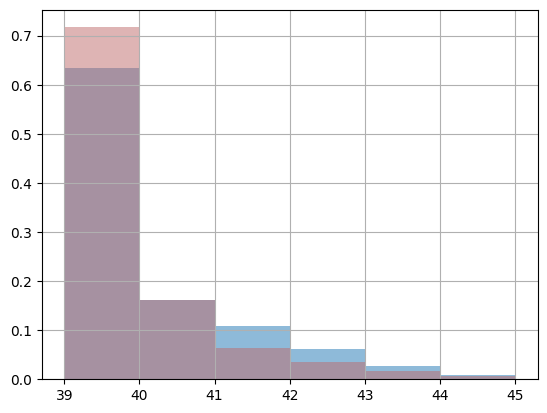

In [54]:
fb39 = df4[(df4.birthOrd == 1)]
ob39 = df4[(df4.birthOrd > 1)]

fb39['prgLength'].hist(bins=6,  density=True, alpha=.5)   # default number of bins = 10, blue
ob39['prgLength'].hist(bins=6,  density=True, alpha=.5, color=sns.desaturate("indianred", .75))

In [55]:
print('Probability First baby to be born on week 39:', 
    len(fb39[(fb39.prgLength == 39)].index)/
    float(len(fb39.index)))

Probability First baby to be born on week 39: 0.634644250975683


In [56]:
print('Probability non first baby to be born on week 39:',
    len(ob39[(ob39.prgLength == 39)].index)/
    float(len(ob39.index)))


Probability non first baby to be born on week 39: 0.7169863775368363


#### Discussions.

After exploring the data we have seen some **appearent effects** that seem to support our first hypothesis:

+ **Data description**: The mean pregnant lenght for first babies is 38.76 and for other babies is 38.65.

+ **Relative risk**: First babies are about 67% more likely to be late.

+ **Conditional probability**: If someone is pregnant and it is the beginning of week 39, the chance (63% vs. 72%) that the baby will be born in the week 39 is lower if it is the first baby.


#### Exercises: Other possible experiments

We can compare the first and others for the same woman. While it may be unlikely it could still be that a tendency exists for a woman's second, third, etc, child comes earlier.

<small>(Result:  The second baby is born about some hours earlier, but this difference is not *statistically significant*.)<small>

In [57]:
# Exercise 1: Disease Testing
# Suppose 1% of a population has a certain disease. A test for the disease is 99% accurate.
# What is the probability that a person has the disease given they tested positive?

In [58]:
# Exercise 2: Coin Toss
# You have a fair coin (equal probability of heads or tails) and a biased coin (75% heads, 25% tails).
# You pick one coin at random and toss it, getting heads. What is the probability you picked the biased coin?

In [59]:
# Exercise 3: Card Draw from a Deck
# From a standard deck of cards (52 cards), you draw one card. 
# What is the probability that it is a heart, given that it is a red card?

In [60]:
# Exercise 4: Rain and Traffic
# It is known that there's a 40% chance of rain today. If it rains, the probability of traffic congestion is 70%.
# If it does not rain, the probability of traffic congestion is 30%. 
# What is the probability that it will rain today given that there is traffic congestion?

In [61]:
# Exercise 5: First Child Birth
# In a hospital, data shows that 60% of deliveries are first-time births.
# Of the first-time births, 30% are by cesarean section. 
# Of the non-first-time births, 20% are by cesarean section.
# What is the probability that a randomly selected cesarean section birth is a first-time birth?

### 4.1 Probability Rules

Probability rules help us understand how different events relate to each other. We'll look at two key rules: one for non-independent events and another for independent events.

#### Non-Independent Events

When events A and B are not independent, the occurrence of one affects the probability of the other. The rule for such cases is:

$$ P(A|B) = \frac{P(A \text{ and } B)}{P(B)} $$

- This formula calculates the probability of event A occurring given that B has already occurred.
- From this, we can derive: 
$$ P(A \text{ and } B) = P(B|A) P(A) = P(A|B) P(B) $$

##### Example of Non-Independent Events:

- **Drawing Cards from a Deck Without Replacement**: 
    - Suppose you have a standard deck of 52 cards. You draw one card, and it's a heart. Without putting it back, you draw another card. The probability of the second card being a heart has changed because the first draw affects the second. Here, the events are not independent.

#### Independent Events

Events A and B are independent if the occurrence of one does not affect the probability of the other. The rule for independent events is:

$$ P(A \text{ and } B) = P(A) P(B) $$ 

- This formula indicates that the probability of both A and B occurring is the product of their individual probabilities.

##### Example of Independent Events:

- **Tossing Coins**: 
    - If you toss a fair coin twice, the result of the first toss doesn't affect the result of the second. These are independent trials. 
    - The probability of getting heads on the first toss is \( \frac{1}{2} \), and the same for the second toss. So, the probability of getting heads on both tosses is \( \frac{1}{2} \times \frac{1}{2} = \frac{1}{4} \).

#### Understanding Independence

- A and B are **independent** if knowing that A occurred does not change the probability of B occurring, and vice versa.
- In real-life scenarios, whether events are independent or not can significantly impact how probabilities are calculated and interpreted.

These rules form the foundation of probability theory and are crucial for understanding more complex probabilistic phenomena.


**Exercises on Conditional Probability:**

1. **Three Children Scenario**:
   - If you have three children, what is the probability that all of them are girls?

2. **At Least One Girl in Three Children**:
   - If you have three children and you know at least one of them is a girl, what is the probability that all three are girls?

3. **Specific Birth Order**:
   - If you have three children and you know the first child is a girl, what is the probability that the other two are also girls?

4. **At Least One Boy in Four Children**:
   - If you have four children and know that at least one of them is a boy, what is the probability that exactly two are boys?

5. **Twins and a Third Child**:
   - If you have three children, including a pair of twins, and you know that at least one of the twins is a girl, what is the probability that the third child is also a girl?

6. **Birthdays and Gender**:
   - If you have three children, and you know that at least one girl was born on a Tuesday, what is the probability that you have two or more girls?

In [62]:
## Your solutions

#### More Probability Rules

Understanding different types of events and how they interact is key in probability theory. Two important concepts are mutually exclusive events and the general rule for the probability of the union of two events.

- #### Mutually Exclusive Events

    - Two events are **mutually exclusive** if they cannot occur at the same time. In other words, the occurrence of one event excludes the possibility of the other event happening.

    - **Mathematical Representation**:
        $[ P(A | B) = P(B | A) = 0 ]$
        - This means the probability of A happening given B has occurred (and vice versa) is zero.
        - For example, when rolling a single die, the events 'rolling a 3' and 'rolling a 5' are mutually exclusive.

    - **Probability of Either Event**:
        $[ P(A \text{ or } B) = P(A) + P(B) ]$
        - For mutually exclusive events, the probability of either A or B occurring is the sum of their individual probabilities.
        - For instance, in a deck of cards, the probability of drawing either a heart or a club is $( \frac{1}{4} + \frac{1}{4} = \frac{1}{2} )$.

- #### Non-Mutually Exclusive Events

    When events A and B are not mutually exclusive, they can occur at the same time. In such cases, the rule to calculate the probability of either event happening is different.

    - **General Rule for Union of Events**:
    $[ P(A \text{ or } B) = P(A) + P(B) - P(A \text{ and } B) ]$
        - This formula accounts for the intersection of A and B (i.e., the probability of both A and B occurring) to avoid double counting.
        - For example, in a deck of cards, the probability of drawing a heart or a king is $( \frac{1}{4} + \frac{1}{13} - \frac{1}{52} )$.

- #### Understanding the Difference

    - **Mutually Exclusive**: No overlap between events. The occurrence of one event excludes the other.
    - **Non-Mutually Exclusive**: Potential overlap. The occurrence of one event does not exclude the possibility of the other.

    Recognizing whether events are mutually exclusive or not is essential in correctly applying these probability rules and avoiding common mistakes in probabilistic reasoning.

**Exercises**: Counting is the most basic skill to solve probability problems.

+ Q: For example, if I flip two coins, the chance of getting at least one tail is: 1/2 + 1/2-1/4=3/4?!
+ Q: If I roll two dices and the total is 8, what is the probability that one of the dice is 6?
+ Q: If I roll 100 dice, what is the probability of getting all sixes? 
+ Q: What is the probability of getting no sixes?
+ Q: What is the probability of getting at least one six?


In [63]:
#Your solution here

## 5. (slides first) Probability Distributions

### 5.1 Binomial Distribution



The binomial distribution is a fundamental probability distribution in statistics, used to model the number of successful outcomes in a fixed number of trials in an experiment.

![](https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2018/09/03051417/11.jpg)

#### Definition of Binomial Distribution

A binomial distribution describes the probability of obtaining exactly $( k )$ successes in $( n )$ independent trials of a binary experiment. The experiment can result in just two possible outcomes, often termed as "success" and "failure".

However, the Bernoulli distribution and the binomial distribution are intrinsically linked:

1. **Bernoulli Distribution**: This is the simplest case of the binomial distribution, where a single trial is conducted. It has only two possible outcomes: success (with probability $( p )$) and failure (with probability $( 1-p )$). Essentially, a Bernoulli distribution is a binomial distribution with $( n=1 )$. [Bernoulli explained](https://www.youtube.com/watch?v=nl9WiZMZnYs&ab_channel=365DataScience)

2. **Binomial Distribution**: This is a generalization of the Bernoulli distribution to $( n )$ independent trials. It represents the number of successes in $( n )$ independent Bernoulli trials, each with the same probability of success $( p )$. The key here is the independence of trials and the constant probability across each trial.[Binomial distribution](https://www.youtube.com/watch?v=_FbZI9mtSSM&ab_channel=365DataScience)

So, the Bernoulli distribution is a special case of the binomial distribution. When you're dealing with more than one trial, and you're interested in the number of successes across those trials, you're working with a binomial distribution. But if you're just looking at one trial, it's a Bernoulli distribution. They are both foundational to understanding binary outcomes in probability theory.


#### Probability Mass Function (PMF)

The Probability Mass Function (PMF) of a binomial distribution, which gives the probability of obtaining \( k \) successes in \( n \) trials, is defined as:

$$[ PMF(k) = {n \choose k} p^k (1-p)^{(n-k)} ]$$

where:

- $( {n \choose k} )$ is the binomial coefficient, representing the number of ways to choose $( k )$ successes out of $( n )$ trials. [Binomial coefficient explained](https://www.youtube.com/watch?v=WHztDZECzlM&t=155s&ab_channel=TheBrightSideofMathematics)
- $( p )$ is the probability of success on an individual trial.
- $( 1-p )$ is the probability of failure on an individual trial.
- $( n )$ is the number of trials.
- $( k )$ is the number of successes.

#### Binomial Coefficient

The binomial coefficient $( {n \choose k} )$ is calculated using the formula:

$[ {n \choose k} = \frac{n!}{k!(n-k)!} ]$

where $( n! )$ (n factorial) is the product of all positive integers up to $( n )$.

#### Characteristics of Binomial Distribution

- **Discrete**: The binomial distribution is discrete, as it only deals with counts of successes and failures.
- **Dependence on $( p )$ and $( n )$**: The shape of the binomial distribution depends on the values of $( p )$ and $( n )$. It can be symmetric or skewed depending on these parameters.
- **Examples**: Tossing a coin a certain number of times and counting the number of heads, or conducting a survey and counting the number of positive responses.

#### Application

Binomial distributions are widely used in scenarios where the outcomes of each trial are binary, such as pass/fail, yes/no, or win/lose situations. They provide a powerful tool for understanding the variability and probabilities in such processes.

Understanding the binomial distribution is key to many areas of statistics and forms the basis for the analysis of binary outcomes in various fields.

*Quality control*

In [64]:
from scipy.stats import binom

# For a manufacturing process, there is always a chance of producing defective items.
# Assume there is a 2% chance of an item being defective.
# We want to find the probability of finding exactly 5 defective items in a batch of 100.

n = 100  # Total number of items in a batch
p = 0.02  # Defect rate (probability of an item being defective)

k = 5  # Number of defective items we're calculating the probability for
prob = binom.pmf(k, n, p)  # pmf is the probability mass function for binomial distribution
print(f"Probability of finding exactly {k} defective items: {prob}")

Probability of finding exactly 5 defective items: 0.035346804727720935


*Call centers*

In [65]:
# In a call center, not all callers are willing to wait to be connected to an operator.
# Suppose there's a 10% chance of a caller hanging up before connection.
# We want to calculate the probability of exactly 10 callers hanging up out of the next 100 calls.

n = 100  # Number of callers
p = 0.1 # Probability of a caller hanging up

k = 10
# Desired number of hang-ups to calculate probability for
prob = binom.pmf(k, n, p)  # Using the binomial probability mass function
print(f"Probability of exactly {k} callers hanging up: {prob:.4f}")

Probability of exactly 10 callers hanging up: 0.1319


*Finance and investing*

In [66]:
# The stock market is unpredictable, but sometimes investors use historical data to make predictions.
# If a stock has a 55% chance of increasing in value on any given day,
# an investor might want to know the probability of the stock increasing 20 out of 30 days.

n = 30  # Number of days
p = 0.55  # Probability of stock increasing in value in a single day

k = 20  # Number of days the investor is hoping the stock will increase
prob = binom.pmf(k, n, p)  # Calculate the probability with binomial distribution
print(f"Probability of stock going up exactly {k} times: {prob:.4f}")

Probability of stock going up exactly 20 times: 0.0656


*Marketing Campaigns*

In [67]:
# Marketing teams often send out advertisements and want to predict the response rate.
# If sending out 10,000 flyers with an expected 1% response rate,
# the binomial distribution can predict the probability of receiving a certain number of responses.

n = 10000  # Number of flyers sent
p = 0.01  # Expected response rate

k = 150  # Number of responses we want to find the probability for
prob = binom.pmf(k, n, p)  # Probability of receiving exactly k responses
print(f"Probability of receiving exactly {k} responses: {prob:.4f}")

Probability of receiving exactly 150 responses: 0.0000


*Loan defaults*

In [68]:
# Banks and financial institutions often assess the risk of loan portfolios.
# If there's a 5% chance of default on an individual loan, they might calculate the probability
# of a certain number of defaults in a portfolio of 1000 loans.

n = 1000  # Total number of loans
p = 0.05  # Probability of default on an individual loan

k = 50  # Number of defaults to calculate probability for
prob = binom.pmf(k, n, p)  # Calculating the probability using binomial distribution
print(f"Probability of exactly {k} loans defaulting: {prob:.4f}")

Probability of exactly 50 loans defaulting: 0.0578


### 5.2 Business challenge



#### Extended Business Challenge: Customer Satisfaction Survey Analysis

##### Scenario
As the restaurant manager, you're planning a customer satisfaction survey over the next month. From past experience, you estimate that on average, 60% of customers provide positive feedback. You'll conduct this survey with 30 customers daily.

##### Complex Task
Your task is to use the binomial distribution to analyze the probability of various outcomes from the survey. This analysis will assist in setting realistic customer satisfaction goals and developing improvement strategies.

##### Challenge Details

1. **Estimate Probabilities**:
    - **Scenario 1**: Calculate the probability of receiving positive feedback from exactly 20 customers in a day.
    - **Scenario 2**: Find the probability of more than 25 customers giving positive feedback in a day.
    - **Scenario 3**: Determine the probability of getting positive feedback from at least 15 but less than 25 customers in a day.

2. **Weekend vs. Weekday Analysis**:
    - On weekends, the probability of positive feedback increases to 70%. Recalculate the probabilities for the above scenarios for weekends.
    - Discuss the differences in probabilities between weekdays and weekends and potential reasons for these variations.

3. **Data Exploration**:
    - Utilize the 'tips' dataset to explore correlations between tipping behavior and customer satisfaction. Investigate trends based on day of the week, time of day, etc.

##### Python Code Framework

The challenge includes a Python code framework for calculating probabilities using the binomial distribution. Students are encouraged to explore the 'tips' dataset for additional insights related to the challenge.

This exercise is designed to enhance understanding of the binomial distribution in a practical business context and should take approximately 30 minutes to complete.

In [69]:
# your code here

## 5A. (extra): Monte Carlo Experiments


Monte Carlo experiments are a critical tool in computational statistics and mathematical analysis. They are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. [Monte Carlo](https://www.youtube.com/watch?v=hhBNk0xmZ9U&ab_channel=365FinancialAnalystTutorials)

### What are Monte Carlo Experiments?

Monte Carlo experiments are a broad class of computational algorithms that rely on **repeated random sampling to obtain numerical results**. The fundamental principle of these experiments is to use randomness to solve problems that might be deterministic in principle. They are especially useful for simulating systems with many coupled degrees of freedom and for calculating integrals in high dimensions.

### Key Features
- **Random Sampling**: At the heart of Monte Carlo methods is the generation of multiple, random samples.
- **Repetition**: Running simulations multiple times to obtain a distribution of an unknown probabilistic entity.
- **Estimation**: They are often used for estimating unknown parameters or distributions in statistical problems.

### Theoretical Basis

Monte Carlo methods are extensively used in fields like physical sciences, engineering, business, finance, and artificial intelligence. They are particularly valuable in situations where analytical solutions are impractical or impossible to find. The theory behind Monte Carlo experiments is grounded in statistical physics and probability theory.

### Trivial Case: Rolling a Die

**Example**: What are the chances of getting a six in one trial of rolling a fair die?

In theory, a fair die has six faces, each equally likely to land face up. Therefore, the probability of getting a six (or any other specific number) in a single roll is 1/6 or approximately 16.67%.

###### Monte Carlo Approach
- **Simulation**: You can simulate rolling a die many times (e.g., 10,000 times) and count how often a six appears.
- **Estimation**: By dividing the number of times a six is rolled by the total number of rolls, you get an estimate of the probability of rolling a six.
- **Convergence**: As the number of trials increases, this estimated probability will converge to the theoretical probability (1/6).

This trivial case illustrates how Monte Carlo methods can approximate the probabilities of certain outcomes through repeated, random sampling. As the complexity of the problem increases, Monte Carlo methods become an indispensable tool for probabilistic analysis and decision-making.


*Portfolio Risk Analysis*: In finance, Monte Carlo simulations are used to model the probability of different outcomes in a financial portfolio.

In [70]:
import numpy as np

# Parameters for the simulation
years = 30
mean_return = 0.07  # Average annual return
std_dev_return = 0.15  # Standard deviation of the return
initial_investment = 100000  # Initial investment amount

# Perform Monte Carlo simulation
final_portfolio_values = []
for _ in range(10000):
    # Generate random yearly returns based on mean and standard deviation
    yearly_returns = np.random.normal(mean_return, std_dev_return, years)
    # Calculate the final portfolio value
    end_value = initial_investment * np.prod(1 + yearly_returns)
    final_portfolio_values.append(end_value)

# Analyze the results
median_portfolio = np.median(final_portfolio_values)
print(f"Median final portfolio value after {years} years: ${median_portfolio:.2f}")


Median final portfolio value after 30 years: $560340.88


*Sales Forecasting*: This Monte Carlo simulation can be used to forecast sales for a product. It takes into account the uncertainty in factors like market demand and unit price.

In [71]:
import numpy as np

# Parameters
num_simulations = 10000
avg_demand = 10000  # average demand units
std_dev_demand = 2000  # standard deviation of demand
avg_price = 50  # average price per unit
std_dev_price = 5  # standard deviation of price

# Monte Carlo Simulation
sales_forecasts = []
for _ in range(num_simulations):
    simulated_demand = np.random.normal(avg_demand, std_dev_demand)
    simulated_price = np.random.normal(avg_price, std_dev_price)
    total_sales = simulated_demand * simulated_price
    sales_forecasts.append(total_sales)

# Analysis of Results
average_sales = np.mean(sales_forecasts)
print(f"Average Forecasted Sales: ${average_sales:.2f}")

Average Forecasted Sales: $500171.14


*Project Completion Time*: Use Monte Carlo simulations to estimate the completion time of a project, considering the uncertainty in the duration of each task.

In [72]:
# Assumptions: a project with three main tasks, each with an estimated duration
# and standard deviation.

num_simulations = 5000
task1_mean = 10  # days
task1_std = 2  # days
task2_mean = 15  # days
task2_std = 3  # days
task3_mean = 20  # days
task3_std = 4  # days

project_durations = []
for _ in range(num_simulations):
    task1_time = np.random.normal(task1_mean, task1_std)
    task2_time = np.random.normal(task2_mean, task2_std)
    task3_time = np.random.normal(task3_mean, task3_std)
    total_time = task1_time + task2_time + task3_time
    project_durations.append(total_time)

average_project_time = np.mean(project_durations)
print(f"Average Project Completion Time: {average_project_time:.2f} days")

Average Project Completion Time: 45.04 days


In [73]:
np.random.normal(task1_mean, task1_std)

7.5277740704424705

### Monte Carlo Business Challenge: Marketing Campaign Analysis

### Overview
In this exercise, you will apply the binomial distribution and Monte Carlo simulation to analyze a marketing campaign's effectiveness. This real-world business scenario will help you understand the practical applications of these statistical tools in decision-making processes.

### Scenario
You are a data analyst at a company planning to launch a new online marketing campaign. From past campaigns, you know that the likelihood of a customer clicking on an ad (click-through rate, CTR) is around 2%. The marketing team plans to send out 1,000 ads each day for a week.

### Objective
Your task is to use Monte Carlo simulations to predict the outcome of the campaign and provide insights into its potential effectiveness.

##### Tasks

1. **CTR Analysis**:
    - Using the binomial distribution, simulate the campaign for 7 days to estimate the number of clicks each day.
    - Assume each ad has an independent 2% chance of being clicked.

2. **Monte Carlo Simulation**:
    - Conduct 10,000 simulations of the 7-day campaign.
    - For each simulation, record the total number of clicks over the week.

3. **Data Analysis**:
    - Analyze the distribution of total clicks over the week from your simulations.
    - Calculate the mean, median, and standard deviation of the total clicks.
    - Determine the probability of getting more than 150 clicks in a week.

4. **Report Findings**:
    - Based on your analysis, provide recommendations to the marketing team.
    - Discuss the reliability of your predictions and how they might impact the campaign strategy.

In [74]:
# your code here

## 6. Continuous Distributions

### 6.0 Intro

Continuous Distributions

So far in our studies, we have focused on **empirical distributions**, which are derived from the distributions of values in a sample. These distributions are directly based on observations and data points we have collected. However, many real-world problems can be more effectively approached by fitting **continuous cumulative distribution functions (CDFs)**.
[Types of distribution](https://www.youtube.com/watch?v=b9a27XN_6tg&ab_channel=365DataScience)

#### What are Continuous Distributions?

Continuous distributions differ from empirical distributions in a few key ways:

- **Analytical Nature**: Unlike empirical distributions that are based on observed data, continuous distributions are described by an analytical function. This function provides a mathematical model to estimate the probability of different outcomes.

- **Continuity**: As the name suggests, continuous distributions are continuous over an interval. This means they can take on any value within a certain range, unlike discrete distributions which are limited to specific, separated values.

#### Continuous Cumulative Distribution Functions (CDFs)

- **Definition**: A CDF is a function that maps from a value to its percentile rank. The CDF of a value, x, in a distribution is the fraction of the data that is less than or equal to x.

- **Properties**:
    - The CDF is a non-decreasing function.
    - It ranges from 0 to 1, where 0 represents no data below a threshold and 1 represents all data below a threshold.

#### Importance in Real-World Problems

- **Better Approximations**: For many real-world phenomena, continuous distributions provide a better approximation than empirical distributions. For example, in physics, economics, and engineering, continuous models can effectively represent complex systems.

- **Analytical Convenience**: Continuous distributions offer mathematical convenience, allowing for the use of calculus and other analytical techniques. This is particularly useful in statistical inference, hypothesis testing, and modeling.

- **Flexibility**: They can model a wide range of processes, from stock market fluctuations to environmental data like temperature and rainfall.

In summary, while empirical distributions are grounded in actual data, continuous distributions offer a more flexible and analytical approach to understanding the probability and behavior of variables in many fields.


#### Understanding the Poisson Distribution

Before exploring the exponential distribution, it is crucial to understand the Poisson distribution, as these two are closely related, particularly in the context of stochastic (random) processes. [Poisson distribution](https://www.youtube.com/watch?v=BbLfV0wOeyc&ab_channel=365DataScience)

#### What is the Poisson Distribution?

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space, assuming these events occur with a known constant mean rate and independently of the time since the last event. 

#### Key Characteristics

- **Discrete Events**: The Poisson distribution is used for countable events, like the number of emails received in an hour or the number of customers arriving at a store in a day.
- **Independence**: Each event is independent of the other events.
- **Constant Mean Rate**: Events occur at a constant rate, denoted as λ (lambda).
- **Interval**: The fixed interval can be time, area, volume, etc.

#### Applications

- **Customer Arrivals**: Modeling customer arrivals at a store or service center.
- **Service Requests**: Number of service requests, such as taxi calls or emergency services, within a given time.
- **Natural Phenomena**: Occurrences of certain types of natural phenomena within a specific period.

#### Relation to Exponential Distribution

While the Poisson distribution is concerned with the number of events in a fixed interval, the exponential distribution is used to model the time between these events. This connection is particularly evident in processes described by a Poisson point process, where the inter-arrival times of events follow an exponential distribution.

Understanding the Poisson distribution provides a foundation for appreciating the exponential distribution's significance in modeling the time between events.

Probability of exactly 0 customers: 0.0000
Probability of exactly 5 customers: 0.0378
Probability of exactly 10 customers: 0.1251
Probability of exactly 15 customers: 0.0347


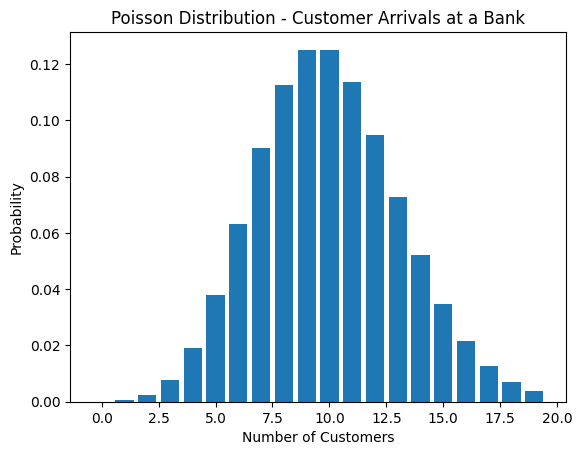

In [75]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Scenario: Managing a bank branch
# Average customer arrivals per hour is 10 (lambda = 10)
lambda_rate = 10

# Calculate probabilities for different numbers of customer arrivals
# For instance, what's the probability of exactly 0, 5, 10, 15 customers arriving in an hour?
prob_0 = poisson.pmf(0, lambda_rate)
prob_5 = poisson.pmf(5, lambda_rate)
prob_10 = poisson.pmf(10, lambda_rate)
prob_15 = poisson.pmf(15, lambda_rate)

print(f"Probability of exactly 0 customers: {prob_0:.4f}")
print(f"Probability of exactly 5 customers: {prob_5:.4f}")
print(f"Probability of exactly 10 customers: {prob_10:.4f}")
print(f"Probability of exactly 15 customers: {prob_15:.4f}")

# Visualizing the distribution of customer arrivals
# Generate a range of possible customer arrival numbers
k_values = np.arange(0, 20)
# Calculate probability for each number of arrivals
pmf_values = poisson.pmf(k_values, lambda_rate)

# Create a bar plot
plt.bar(k_values, pmf_values)
plt.title("Poisson Distribution - Customer Arrivals at a Bank")
plt.xlabel("Number of Customers")
plt.ylabel("Probability")
plt.show()

### 6.1.1 The Exponential Distribution



The exponential distribution is a continuous probability distribution commonly used to model the time between events in a Poisson point process. It is a particular case of the gamma distribution and is intrinsically related to the Poisson distribution.

#### Cumulative Distribution Function (CDF)

The CDF of the exponential distribution is defined as:

$$ CDF(x) = 1 -  \exp^{- \lambda x} $$ 

- Here, $( x )$ is the variable (time, distance, etc.), and $( \lambda )$ is the rate parameter.
- The CDF represents the probability that a real-valued random variable X with an exponential distribution is less than or equal to $( x )$.

#### Probability Density Function (PDF)

The PDF of the exponential distribution is given by:

$$ PDF(x) = \lambda \exp^{- \lambda x} $$

- This function describes the probability of the variable taking a particular value.

#### Characteristics of the Exponential Distribution

- **Rate Parameter ($( \lambda )$)**: Determines the shape of the distribution. It is the inverse of the mean (or the average rate at which events occur).
- **Mean and Variance**:
    - The mean of the distribution is $( \frac{1}{\lambda} )$.
    - The variance is $( \frac{1}{\lambda^2} )$.
- **Median**: The median of the exponential distribution is $( \frac{\ln(2)}{\lambda} )$.

#### Real-World Applications

- **Interarrival Times**: Exponential distributions are frequently used to model interarrival times in systems where events occur continuously and independently at a constant average rate. For example, the time between arrivals of customers at a service center or the time between failures of a mechanical system.

- **Memoryless Property**: One key property of the exponential distribution is its memorylessness. It means that the probability of an event occurring in the next instant is independent of how much time has already elapsed.

#### Example: Birth Times in a Hospital

An illustrative example is the modeling of interarrival times of births in a hospital. For instance, if 44 births are registered in 24 hours, the rate $( \lambda )$ can be estimated as 0.0306 births per minute. The mean interarrival time, therefore, would be approximately 32.7 minutes, following an exponential distribution.

This example showcases how the exponential distribution can model the time between consecutive events, like births in a hospital, using real-world data.


#### Business Example: Customer Service Call Interarrival Times

In customer service operations, understanding the pattern of incoming calls is crucial for efficient resource allocation and ensuring high-quality customer support. One way to analyze call patterns is by studying the interarrival times of calls, which can often be modeled using an exponential distribution.

##### Scenario: Call Center Operations

In a typical customer service center, calls from customers come in at random intervals. These intervals, known as interarrival times, are often best modeled by an exponential distribution, particularly when calls are independent events and tend to occur at a constant average rate.

##### Objective

The goal is to simulate and analyze the interarrival times of customer service calls using an exponential distribution. This analysis will provide insights into the average waiting time between calls, which is a key metric for managing staffing levels and optimizing customer service response times.

##### Tasks

1. **Simulate Interarrival Times**: Generate a series of interarrival times based on a predefined average call rate using the exponential distribution.
2. **Data Visualization**: Create a histogram to visualize the distribution of interarrival times.
3. **Statistical Analysis**: Calculate and interpret the mean interarrival time to aid in decision-making for call center management.

This exercise will demonstrate how to apply the exponential distribution in a real-world business context, providing valuable data-driven insights for operational planning and strategy.


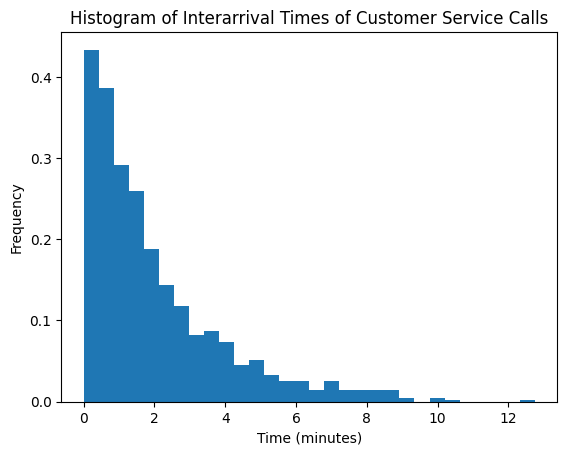

Mean Interarrival Time: 2.01 minutes


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 0.5  # Average rate of calls per minute (0.5 calls/minute)
num_calls = 1000   # Total number of calls to simulate

# Generate interarrival times using exponential distribution
interarrival_times = np.random.exponential(1/lambda_rate, num_calls)

# Visualizing the interarrival times
plt.hist(interarrival_times, bins=30, density=True)
plt.title("Histogram of Interarrival Times of Customer Service Calls")
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")
plt.show()

# Calculating the mean interarrival time
mean_interarrival = np.mean(interarrival_times)
print(f"Mean Interarrival Time: {mean_interarrival:.2f} minutes")

#### Occurrence of Events

The exponential distribution occurs naturally when describing the lengths of the inter-arrival times in a homogeneous Poisson process.

In real-world scenarios, the assumption of a constant rate (or probability per unit time) is rarely satisfied. For example, the rate of incoming phone calls differs according to the time of day. But if we focus on a time interval during which the rate is roughly constant, such as from 2 to 4 p.m. during work days, the exponential distribution can be used as a good approximate model for the time until the next phone call arrives. Similar caveats apply to the following examples which yield approximately exponentially distributed variables:

- The time until a radioactive particle decays, or the time between clicks of a Geiger counter.
- The time it takes before your next telephone call
- The time until default (on payment to company debt holders) in reduced form credit risk modeling

The random variable $X$ of the lifelengths of some batteries is associated with a probability density function of the form:

$$ PDF(x) = \frac{1}{4} \exp^{- \frac{x}{4}}$$ 

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_8254/1710952079.py:5: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Exponential: $\lambda$ =%.2f' % l ,fontsize=15)


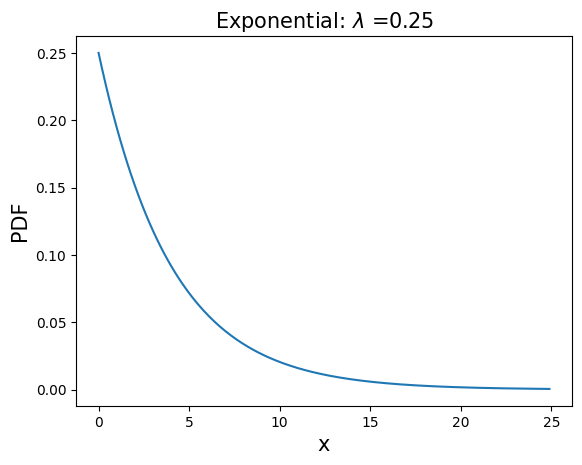

In [77]:
l = 0.25
x=np.arange(0,25,0.1)
y= l * np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('PDF',fontsize=15)
plt.show()

#### Example 1

The number of days ahead travelers purchase their airline tickets can be modeled by an exponential distribution with the average amount of time equal to 15 days. 

- (a) Find the probability that a traveler will purchase a ticket fewer than 10 days in advance. 


Answer: 

Remember: The parameter  𝜆  determines the shape of the distribution, the mean of the distribution is  1/𝜆. The median is  𝑙𝑛(2)/𝜆.

First we need to calculate the rate parameter: 𝜆=1/15=0.066667. Then we can calculate 𝑃(𝑋<10)=1−𝑒(−𝜆*10)=0.4865.

- (b) How many days do half of all travelers wait?

Answer:  
We know that the Median of the exponential distribution is 𝑀𝑒𝑑𝑖𝑎𝑛=(ln2)/𝜆=10.397

#### Example 2

On the average, a certain device lasts 10 years. Assume that the length of time is exponentially distributed.

- a) What is the probability that the device lasts more than 7 years?

Answer: For the beginning 𝜆=1/10=0.1
 𝑃(𝑋>7)=1−𝑃(𝑋≤7)=1–(1−𝑒−𝜆𝑥)=𝑒−𝜆𝑥=𝑒−(0.1)(7)=0.4966

- b) On the average, how long would five devices last if they are used one after another?

Answer: On the average, 1 device lasts ten years. Therefore, 5 devices, if they are used one right after the other would last, on the average, (5)(10) = 50 years.

- c) What is the probability that a device lasts between 9 and 11 years?

Answer: 𝑃(9<𝑋<11)=𝑃(𝑋<11)−𝑃(𝑋<9)=(1−𝑒−(0.1)(11))–(1−𝑒−(0.1)(9))=0.0737

### 6.1.2 The normal distribution

The normal distribution, also known as the Gaussian distribution, is one of the most important and widely used probability distributions in statistics. It is favored for its simplicity and its ability to describe a wide range of natural phenomena. The normal distribution is characterized by two parameters: the mean (μ) and the standard deviation (σ). [normal distribution](https://www.youtube.com/watch?v=IhtmW28slDw&ab_channel=365DataScience)

- **Symmetry**: The normal distribution is symmetric around its mean (μ), which means that the probability density function (PDF) is highest at the mean and decreases symmetrically in both directions. This symmetry makes it a convenient choice for modeling many real-world phenomena.

- **Bell-shaped Curve**: The probability density function (PDF) of the normal distribution has a bell-shaped curve. As you move away from the mean in either direction, the probability of observing values decreases gradually, following a smooth and continuous curve.

- **Central Limit Theorem**: One of the most important properties of the normal distribution is the Central Limit Theorem. It states that the sum (or average) of a large number of independent, identically distributed random variables approaches a normal distribution, regardless of the original distribution of those variables. This property makes the normal distribution highly relevant in statistical inference and hypothesis testing.

- **Parameters**:
   - **Mean (μ)**: The mean represents the center of the distribution and determines its location on the horizontal axis.
   - **Standard Deviation (σ)**: The standard deviation controls the spread or dispersion of the distribution. A larger σ results in a wider distribution, while a smaller σ leads to a narrower one.

- **Probability Density Function (PDF)**: The probability density function of the normal distribution is given by the formula:

   $$ PDF(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right)$$

This distribution is widely used in various fields of science, engineering, and social sciences due to its simplicity and applicability to a wide range of real-world data.

![](https://www.nlm.nih.gov/oet/ed/stats/img/Distribution_14.png)

#### Example: Analyzing Employee Salaries Using the Normal Distribution in Python

In the world of business and human resources, understanding and managing employee salaries are essential tasks. The normal distribution, also known as the Gaussian distribution, provides a powerful statistical tool to model and analyze salary distributions within organizations. In this example, we will explore how to use Python to simulate and visualize employee salaries following a normal distribution.

The normal distribution is characterized by two key parameters: the mean (μ), which represents the average salary, and the standard deviation (σ), which measures the spread or variability in salaries. By modeling employee salaries as a normal distribution, businesses can make informed decisions related to salary ranges, performance evaluations, and financial planning.

In this demonstration, we will:

- Define the mean and standard deviation for employee salaries.
- Generate synthetic data representing employee salaries following a normal distribution.
- Visualize the salary distribution using a histogram.
- Overlay the probability density function (PDF) of the normal distribution on the histogram.
- Discuss how this information can be used for HR and financial decision-making within organizations.

Let's dive into Python to explore these concepts and gain insights into employee salary distributions.

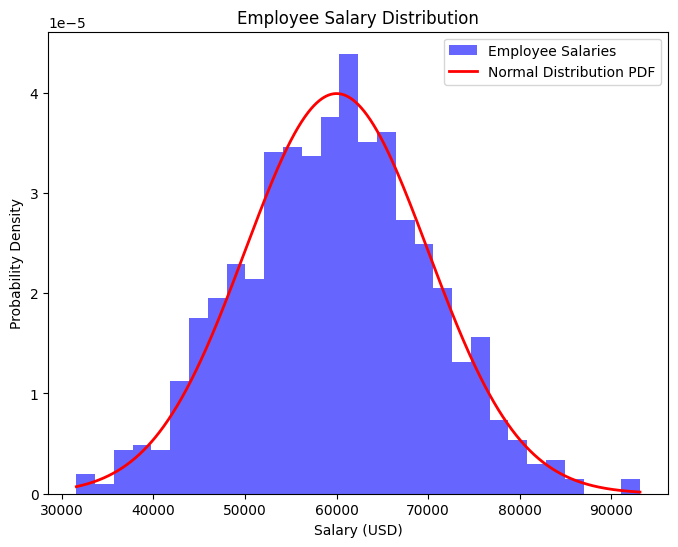

In [78]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the mean and standard deviation for employee salaries
mean_salary = 60000  # Mean salary in USD
std_deviation = 10000  # Standard deviation in USD

# Generate synthetic data following a normal distribution
num_employees = 1000  # Number of employees
employee_salaries = np.random.normal(mean_salary, std_deviation, num_employees)

# Plot a histogram of employee salaries
plt.figure(figsize=(8, 6))
plt.hist(employee_salaries, bins=30, density=True, alpha=0.6, color='b', label='Employee Salaries')

# Generate a range of x values for the probability density function (PDF)
x_values = np.linspace(min(employee_salaries), max(employee_salaries), 1000)

# Calculate the PDF using the scipy.stats.norm library
pdf_values = norm.pdf(x_values, mean_salary, std_deviation)

# Plot the PDF as a smooth curve
plt.plot(x_values, pdf_values, 'r-', lw=2, label='Normal Distribution PDF')

# Add labels and a legend to the plot
plt.xlabel('Salary (USD)')
plt.ylabel('Probability Density')
plt.title('Employee Salary Distribution')
plt.legend()

# Show the plot
plt.show()


# END OF DAY 1

### 6.2 (Slides First) Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental concept in statistics, and it plays a crucial role in explaining why the normal distribution is so pervasive in various fields.[Central Limit Theorem](https://www.youtube.com/watch?v=b5xQmk9veZ4&ab_channel=365DataScience)

#### The Central Limit Theorem Explained

The Central Limit Theorem states that:

> If you take the mean of $( n )$ random samples from any arbitrary distribution with a well-defined standard deviation $( \sigma )$ and mean $( \mu )$, as $( n )$ gets larger, the distribution of the sample mean will converge to a Gaussian (normal) distribution with mean $( \mu $) and standard deviation $( \frac{\sigma}{\sqrt{n}} )$.

#### Key Aspects of the CLT

- **Applicability to Any Distribution**: The CLT is remarkable because it applies to any distribution, no matter its shape, as long as the distribution has a well-defined mean and standard deviation.
- **Sample Size and Normal Distribution**: As the sample size increases, the distribution of the sample means tends toward a normal distribution, regardless of the shape of the original data distribution.
- **Mean and Standard Deviation of the Sample Means**: The mean of these sample means will equal the population mean (\( \mu \)), and their standard deviation (also called the standard error) will be \( \frac{\sigma}{\sqrt{n}} \).

#### Why is the CLT Significant?

- **Ubiquity of the Normal Distribution**: The CLT helps to explain why normal distributions are commonly observed in real-world data—even when the underlying data does not follow a normal distribution.
- **Foundation for Statistical Methods**: This theorem underlies many statistical methods, such as hypothesis testing and confidence intervals. It allows for inferences about population parameters even when the distribution of the population is unknown.
- **Practical Implications**: In practical terms, the CLT means that average measurements from random samples (like the average height from a sample of people) will tend to form a normal distribution, even if individual measurements themselves do not.

#### Applications and Implications

The CLT has widespread applications across various domains, from natural and social sciences to engineering and economics. It allows researchers and practitioners to use the powerful tools of normal distribution, even in situations where the data does not initially appear to fit this model.

In essence, the Central Limit Theorem provides a bridge between the theory of probability and the practice of statistics, justifying the use of the normal distribution as a model in many practical situations.


#### Example Central Limit Theorem in Business: Daily Sales Analysis

In this exercise, we'll explore the Central Limit Theorem (CLT) using a practical business example. We will simulate a common scenario in retail - daily sales. Understanding the CLT can be crucial in business for making predictions and understanding data trends.

#### Scenario: Retail Store Daily Sales

In a retail environment, daily sales can vary significantly and might not follow a normal distribution. However, by applying the CLT, we can understand how the average sales over time behave, which is critical for inventory management, staffing, and financial forecasting.

#### Objective

The aim is to simulate daily sales data, compute sample means over different sample sizes, and observe how these sample means form a distribution. According to the CLT, as the sample size increases, the distribution of the sample means should approximate a normal distribution, regardless of the shape of the original sales data distribution.

#### Python Simulation

The provided Python code carries out the following steps:
1. Generates random daily sales figures assuming a uniform distribution (non-normal).
2. Calculates sample means for different sample sizes.
3. Plots the distribution of these sample means.
4. Fits a normal distribution over the sample means to visualize the CLT.

This practical example will demonstrate the power of the CLT in a business context, showcasing its relevance and application in everyday data analysis tasks in the retail industry.


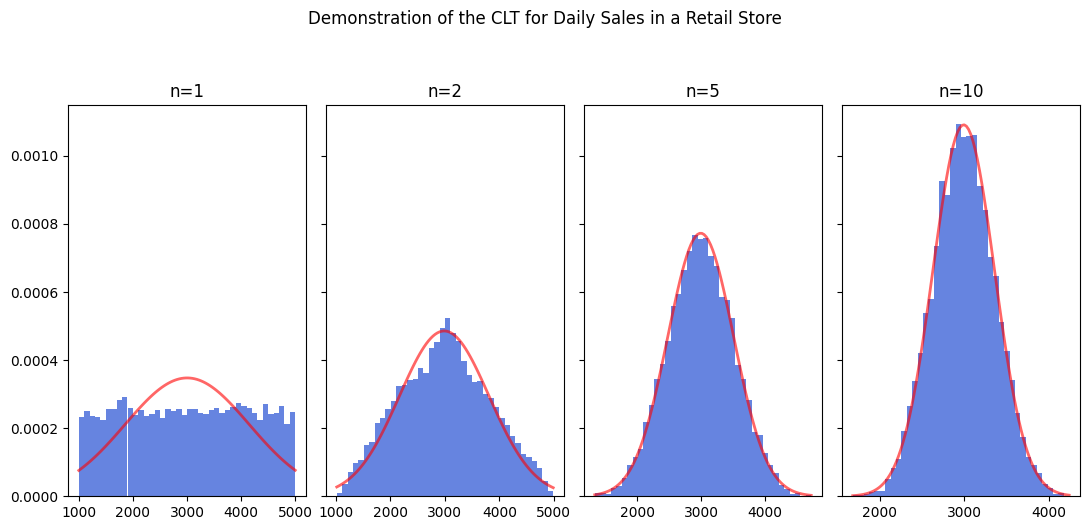

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Setting up a demonstration of the Central Limit Theorem (CLT) using daily sales data
fig, ax = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(11, 5))

# Assume sales amounts are uniformly distributed between $1000 and $5000
lower_bound, upper_bound = 1000, 5000
sample_sizes = [1, 2, 5, 10]  # Different sample sizes to demonstrate the CLT

for i, n in enumerate(sample_sizes):
    # Generating random daily sales data for 'n' days
    daily_sales = np.random.uniform(lower_bound, upper_bound, (10000, n))

    # Calculating the mean of daily sales for each of the 10,000 samples
    sample_means = np.mean(daily_sales, axis=1)

    # Plotting the histogram of the sample means
    ax[i].hist(sample_means, bins=40, density=True, color=[0, 0.2, .8, .6])
    ax[i].set_title(f'n={n}')

    # Fitting a normal distribution to the sample means
    mean, std = np.mean(sample_means), np.std(sample_means, ddof=1)
    x = np.linspace(min(sample_means), max(sample_means), 100)
    normal_pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
    
    # Plotting the fitted normal distribution over the histogram
    ax[i].plot(x, normal_pdf, color=[1, 0, 0, .6], linewidth=2)

plt.suptitle('Demonstration of the CLT for Daily Sales in a Retail Store', y=1.05)
plt.tight_layout()
plt.show()


#### Business Challenge: Analyzing Customer Spending Habits Using the Central Limit Theorem

#### Scenario: Retail Company's Customer Spending Analysis

You are a data analyst in a retail company, and your task is to analyze customer spending behavior. The company's data on customer purchases shows wide variability, and the distribution of individual purchases does not appear to follow a normal distribution.

#### Objective

Utilize the Central Limit Theorem to analyze the average spending per customer. The goal is to provide insights that can help the marketing and sales teams in strategic planning and targeted promotions.

#### Tasks

1. **Data Collection**: Gather data on individual customer purchases over a certain period.
2. **Sample Averages**: Create random samples of customer purchases and calculate the average spending for each sample.
3. **Apply the CLT**: Observe how the distribution of these sample means behaves as the sample size increases.
4. **Statistical Analysis**: Analyze the resulting distribution of the sample means - it should approximate a normal distribution as per the CLT.
5. **Insights and Strategy Development**: Based on the analysis, provide insights into customer spending patterns. Discuss how these insights can inform marketing strategies, discount offers, and inventory management.

#### Expected Outcome

This challenge will demonstrate how the Central Limit Theorem can be applied in a practical business setting to extract meaningful insights from seemingly non-normal data. It will enhance your understanding of statistical methods in business analytics and their application in strategic decision-making.


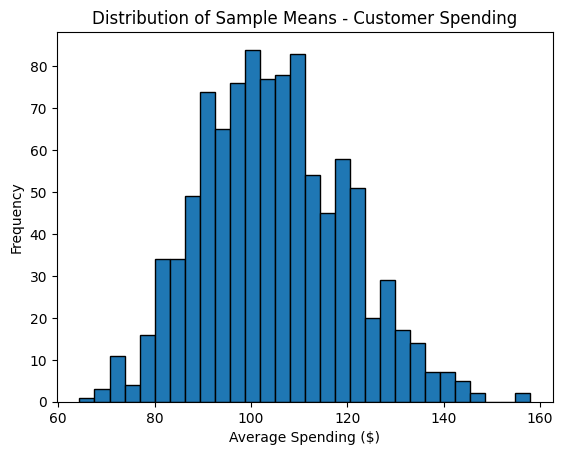

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# This function simulates customer spending data
def generate_customer_spending(num_customers):
    # Simulate a non-normal distribution of spending (e.g., exponential, skewed, etc.)
    return np.random.exponential(100, num_customers)  # Change parameters as needed

# Function to calculate sample means
def calculate_sample_means(data, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

# Parameters for simulation
num_customers = 1000  # Total number of customer data points
sample_size = 50      # Size of each sample
num_samples = 1000    # Number of samples to take

# Generate customer spending data
customer_spending = generate_customer_spending(num_customers)

# Calculate sample means
sample_means = calculate_sample_means(customer_spending, sample_size, num_samples)

# Plot the distribution of sample means
plt.hist(sample_means, bins=30, edgecolor='black')
plt.xlabel('Average Spending ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means - Customer Spending')
plt.show()

**The Central Limit Theorem explains the importance of normal distributions in the real world. Many features and properties of the living beings depend on genetic and environmental factors which effect usually is additive.** The measured features are sum of manny small effects that not necessarily follow the normal distributions, but their sum does follow according to the Central Limit Theorem.



## 6A. (Extra) Kernel density estimates 



In some instances, we may not be interested in the parameters of a particular distribution of data, but just a **continous representation** of the data at hand. In this case, we can estimate the distribution non-parametrically (i.e. making no assumptions about the form of the underlying distribution) using kernel density estimation.

Several uses are defined:

- **Visualization** - to explore the data by visualizing them and decide whether an estimated PDF is an appropriate model for the distribution.

- **Interpolation** - if we have reasons to beleive that the distribution is smooth, we can apply the KDE to interpolate the density specially for values that were not sampled.

- **Simulation** - specially when the sample distribution is small, it would be convenient to smooth the sample distribution by KDE in order to simulated and explore more possible outcomes, rather than replicating the observed data.

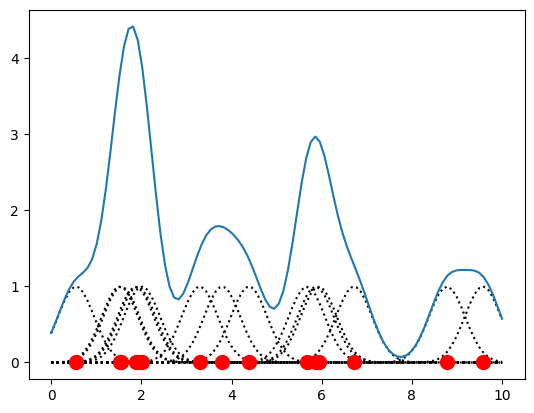

In [81]:
from scipy.stats.distributions import norm

# Some random data
y = np.random.random(15) * 10
x = np.linspace(0, 10, 100)
# Smoothing parameter
s = 0.4

# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1))
plt.plot(y, np.zeros(len(y)), 'ro', ms=10)

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. Let's create a bi-modal distribution of data that is not easily summarized by a parametric distribution:

(array([0.00294226, 0.03824935, 0.0353071 , 0.10592129, 0.07355645,
        0.02648032, 0.07649871, 0.08238323]),
 array([-8.31165574, -6.04582231, -3.77998888, -1.51415545,  0.75167798,
         3.01751141,  5.28334484,  7.54917828,  9.81501171]),
 <BarContainer object of 8 artists>)

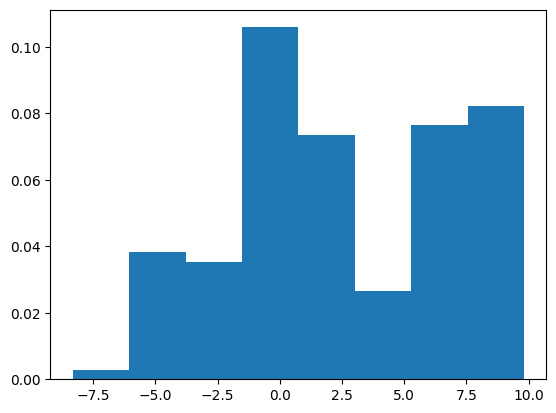

In [82]:
# Create a bi-modal distribution with a mixture of Normals.
x1 = np.random.normal(0, 3, 100) # parameters: (loc=0.0, scale=1.0, size=None)
x2 = np.random.normal(8, 1, 50)

# Append by row
x = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.


plt.hist(x, bins=8, density=True)

/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_8254/3976795293.py:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(x)


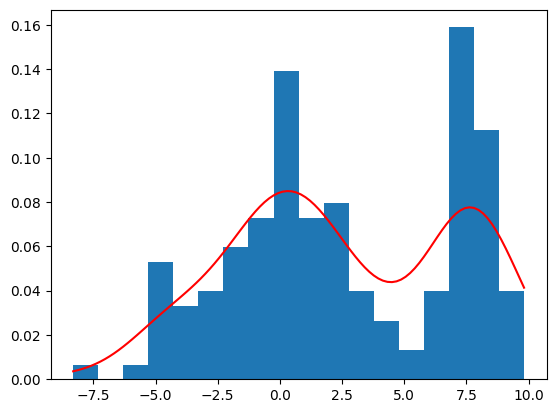

In [83]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=18, density=True)
plt.plot(xgrid, density(xgrid), 'r-')

## 7 (EXTRA) Estimation


* 4.1 Sample mean
* 4.2 Variance
* 4.3 Standard scores
* 4.4 Covariance
* 4.5 Pearson,s correlation
* 4.6 Spearman's rank correlation

Let's think of a sequence of values: 
[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138].

Can you guess which is the distribution? For example what would be its mean?

Hint: assume that it is normal distribution.


**Definition:** *Estimation* is the process of inferring the parameters (e.g. mean) of a distribution from a statistic of samples drown from a population.

For example: What is the estimated mean $\hat{\mu}$ of the following normal data?

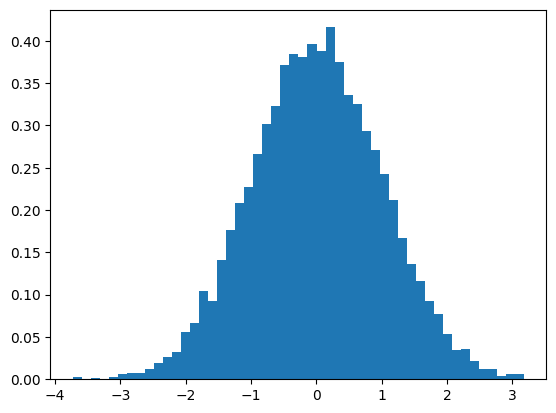

In [84]:
x = np.random.normal(0.0, 1.0, 10000)
a = plt.hist(x,50,density='True')

We can use our definition of empirical mean:

In [85]:
print('The empirical mean of the sample is ', x.mean())

The empirical mean of the sample is  0.00834714084681676


Let us imagine that we were reported the following data, where probably one of the data is wrong:

In [86]:
x=np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -213.8])
print(x.mean())

-35.121833333333335


Is the mean estimator good enough?

### 4.1 Sample mean

+ The process is called **estimation** and the statistic we used **estimator**.

+ The median is also an estimator (more robust to outliers). 

+ "Is median better than sample mean?" is a question with at least two different answers. We can use two different objectives to answer this question: the minimization of error or the maximization to get the right answer. 

+ If there are no outliers, we can use the **sample mean** to minimize **mean squared error** (where $m$ is the number of times you play the estimation game, not the size of the sample!):

$$ MSE = \frac{1}{m} \sum(\hat{\mu} - \mu)^2$$


In [87]:
err = 0.0
mu=0.0
NTests=1000
var=1.0
NPoints=100000
for i in range(NTests):
    x = np.random.normal(mu, var, NPoints)
    err += (mu - x.mean())**2

print('MSE: ', err/float(NTests) )

MSE:  9.517611398843136e-06


### 4.2 Variance

We can also estimate the variance with:

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

This estimator works for large samples, but it is biased for small samples. We can use this one:

$$ \hat{\sigma}^2_{n-1} = \frac{1}{n-1} \sum_i (x_i - \mu)^2 $$


### 4.3 Other concepts: Standard scores

$$ z_i = \frac{x_i - \mu}{\sigma}$$

This measure is dimensionless and its distribution has mean 0 and variance 1.

It inherits the "shape" of $X$: if it is normally distributed, so is $Z$. If $X$ is skewed, so is $Z$.

### 4.4 Covariance (optional)

Sometimes it would be of interest to measure the relationship between two variables. 

**Covariance** is a measure of the tendency of two variables to vary together. 

If we have two series $X$ and $Y$ with $X=\{x_i\}$ and $Y=\{y_i\}$, and they vary together, their deviations $x_i - \mu_X$ and $y_i - \mu_Y$ tend to have the same sign.

If we multiply them together, the product is positive, when the deviations have the same sign, and negative, when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.

Covariance is the mean of the products:

$$ Cov(X,Y) = \frac{1}{n} \sum (x_i - \mu_X)*(y_i - \mu_Y), $$

where $n$ is the length of the two series.

It is a measure that is difficult to interpret.

In [88]:
def Cov(X, Y):
    def _get_dvis(V):
        return [v - np.mean(V) for v in V]
    dxis = _get_dvis(X)
    dyis = _get_dvis(Y)
    return np.sum([x * y for x, y in zip(dxis, dyis)])/len(X)

X = [5, -1, 3.3, 2.7, 12.2]
Y=[10,12,8,9,11]

#print("Cov(X, X) = %.2f" % Cov(X, X))
#print("Var(X) = %.2f" % np.var(X))

print("Cov(X, Y) = %.2f" % Cov(X, Y))


Cov(X, Y) = 0.18


<center><img src="images/gasolineprice.gif"></center>

### 4.5 Pearson's Correlation

Shall we take into account the variance? An alternative is to divide the deviations by $\sigma$, which yields standard scores, and compute the product of standard scores:

$$ p_i = \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y} $$
 
The mean of these products is:

$$ \rho = \frac{1}{n} \sum p_i = \frac{1}{n} \sum  \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y}  $$

Or we can rewrite $\rho$ by factoring out $\sigma_X$ and $\sigma_Y$:

$$ \rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

 


In [89]:
def Corr(X, Y):
    assert len(X) == len(Y)
    return Cov(X, Y) / np.prod([np.std(V) for V in [X, Y]])

print("Corr(X, X) = %.5f" % Corr(X, X))

Y=np.random.random(len(X))

print("Corr(X, Y) = %.5f" % Corr(X, Y))

Corr(X, X) = 1.00000
Corr(X, Y) = -0.69605


<center><img src="images/pearson.png"></center>

When $\rho = 0$, we cannot say that there is no relationship between the variables!

Pearson's coefficient only measures **linear** correlations!

### 4.6 Spearman’s rank correlation

Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of **outliers**.

Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions. To compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample. 

For example, in the sample {7, 1, 2, 5} the rank of the value 5 is 3, because it appears third if we sort the elements. 

Then, we compute the Pearson’s correlation, **but for the ranks**.

ranks:  [4.0, 1.0, 2.0, 3.0]
Pearson rank coefficient: 0.27
Spearman rank coefficient: 0.80


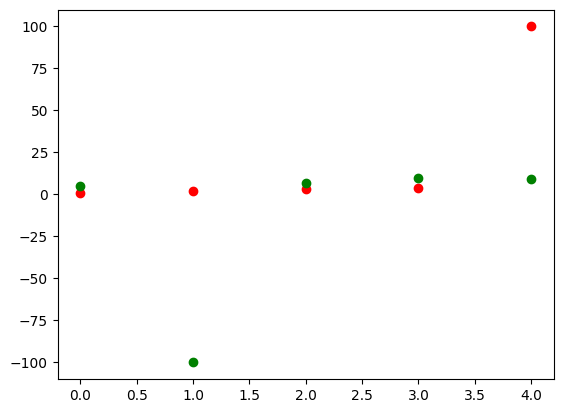

In [90]:
def list2rank(l):
    #l is a list of numbers
    # returns a list of 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

l = [7, 1, 2, 5]
print("ranks: ", list2rank(l))

def spearmanRank(X, Y):
    # X and Y are same-length lists
    return Corr(list2rank(X), list2rank(Y))

X = [1, 2, 3, 4, 100]
Y = [5, -100, 7, 10, 9]
plt.plot(X,'ro')
plt.plot(Y,'go')

print("Pearson rank coefficient: %.2f" % Corr(X, Y))
print("Spearman rank coefficient: %.2f" % spearmanRank(X, Y))


**Exercise:** Obtain for the Anscombe's quartet, the different estimators (mean, variance, covariance for each pair, Pearson's correlation and Spearman's rank correlation.

(Source: http://en.wikipedia.org/wiki/Anscombe's_quartet):

<center><img src="images/Anscombe's_quartet.png"></center>

In [91]:
#Your solution here.


### Main reference

*Think Stats: Probability and Statistics for Programmers*, by Allen B. Downey, published by O'Reilly Media.

http://www.greenteapress.com/thinkstats/



## Solutions

**Exercises and Answers:**

1. **Example where for all data samples, $x_i \leq \mu$:**
    - **Scenario:** All data points are less than or equal to the mean of the distribution.
    - **Real-World Example:** Age of Retirement. In a profession or company with a strictly regulated retirement age of 65 years, people might retire earlier for various reasons, but no one retires later than 65. Thus, all data points (retirement ages) will be less than or equal to the mean retirement age.

2. **Example where for all data samples, $x_i \leq \mu_{\frac{1}{2}}$:**
    - **Scenario:** A distribution where all data points are less than or equal to the median.
    - **Real-World Example:** Wealth Distribution. In a society with significant income disparity, most individuals have wealth at or below the median, due to a few extremely wealthy individuals skewing the mean much higher than the median.

3. **Distribution from asking people about their driving skills relative to the average driver:**
    - **Expected Outcome:** A majority of people are likely to rate themselves as above-average drivers due to a cognitive bias known as "illusory superiority." This would result in a distribution skewed to the right, with more people claiming to be better than average.

In [92]:
# Exercise 1: Disease Testing Solution
# Probability that a person has the disease given they tested positive
population_disease_rate = 0.01  # 1% of the population has the disease
test_accuracy = 0.99  # Test is 99% accurate
prob_positive_given_disease = test_accuracy
prob_positive = (population_disease_rate * test_accuracy) + ((1 - population_disease_rate) * (1 - test_accuracy))
prob_disease_given_positive = prob_positive_given_disease * population_disease_rate / prob_positive
print(prob_disease_given_positive)
# Exercise 2: Coin Toss Solution
# Probability of picking the biased coin given you got heads
prob_fair_coin = 0.5
prob_biased_coin = 0.5
prob_heads_fair = 0.5
prob_heads_biased = 0.75
prob_heads_total = (prob_fair_coin * prob_heads_fair) + (prob_biased_coin * prob_heads_biased)
prob_biased_given_heads = (prob_biased_coin * prob_heads_biased) / prob_heads_total

# Exercise 3: Card Draw from a Deck Solution
# Probability that the card is a heart given it's a red card
prob_heart = 13 / 52  # Hearts in a deck
prob_red = 26 / 52   # Red cards in a deck
prob_heart_given_red = prob_heart / prob_red

# Exercise 4: Rain and Traffic Solution
# Probability that it will rain today given that there is traffic congestion
prob_rain = 0.4
prob_traffic_given_rain = 0.7
prob_traffic_given_no_rain = 0.3
prob_traffic = (prob_rain * prob_traffic_given_rain) + ((1 - prob_rain) * prob_traffic_given_no_rain)
prob_rain_given_traffic = (prob_rain * prob_traffic_given_rain) / prob_traffic

# Exercise 5: First Child Birth Solution
# Probability that a randomly selected cesarean section birth is a first-time birth
prob_first_time_birth = 0.6
prob_cesarean_first_time = 0.3
prob_cesarean_not_first_time = 0.2
prob_cesarean_total = (prob_first_time_birth * prob_cesarean_first_time) + ((1 - prob_first_time_birth) * prob_cesarean_not_first_time)
prob_first_time_given_cesarean = (prob_first_time_birth * prob_cesarean_first_time) / prob_cesarean_total

0.4999999999999997


**Solutions to Exercises on Conditional Probability:**

1. **Three Children Scenario**:
   - Probability all are girls = $( \frac{1}{2} \times \frac{1}{2} \times \frac{1}{2} = \frac{1}{8} )$ or 12.5%.

2. **At Least One Girl in Three Children**:
   - With at least one girl, the sample space reduces to GGG, GGB, GBG, BGG (where G = girl, B = boy). 
   - Probability all three are girls = ( \frac{1}{4} )$ or 25%.

3. **Specific Birth Order**:
   - Knowing the first child is a girl, we only consider GGG, GGB, and GBG.
   - Probability the other two are also girls = $( \frac{1}{3} )$ or about 33.3%.

4. **At Least One Boy in Four Children**:
   - With at least one boy, we exclude all-girl combinations.
   - Probability exactly two are boys involves counting all combinations with two boys and two girls, which is $( \binom{4}{2} = 6 )$ (BBGG, BGBG, BGGB, GBBG, GBGB, GGBB).
   - Total combinations (excluding all girls) = 15.
   - Probability = $( \frac{6}{15} = \frac{2}{5} )$ or 40%.

5. **Twins and a Third Child**:
   - Knowing one of the twins is a girl, the twin combinations are GG, GB, BG.
   - Each of these combined with the third child's gender gives GG(G/B), GB(G/B), BG(G/B).
   - Probability the third child is a girl = $( \frac{3}{6} = \frac{1}{2} )$ or 50%.

6. **Birthdays and Gender**:
   - This is a more complex problem, as it involves considering the additional variable of the day of the week.
   - Assuming uniform distribution of birthdays across days of the week, and that the fact a girl is born on a Tuesday is independent of the gender of other children.
   - Probability calculations in this scenario involve detailed combinatorial considerations and are beyond the scope of a simple solution here.

These solutions apply basic principles of conditional probability, considering the given information and how it affects the probability of various outcomes.


In [93]:
## Business Challenge Chapter 5

import seaborn as sns
from scipy.stats import binom

# Load the dataset
tips = sns.load_dataset('tips')

# Explore the dataset for trends related to customer satisfaction
# tips.head()
# Analyze tipping behavior by day, time, etc.

# Binomial distribution parameters
n = 30  # Number of surveyed customers per day
p_weekday = 0.60  # Probability of positive feedback on weekdays
p_weekend = 0.70  # Probability of positive feedback on weekends

# Calculate probabilities for different scenarios
# Probability of exactly 20 positive feedbacks on a weekday
prob_20_weekday = binom.pmf(20, n, p_weekday)

# Probability of more than 25 positive feedbacks on a weekend
prob_more_25_weekend = 1 - binom.cdf(25, n, p_weekend)

# Probability of receiving 15 to 24 positive feedbacks on a weekday
prob_15_to_24_weekday = binom.cdf(24, n, p_weekday) - binom.cdf(14, n, p_weekday)

# Output the results
print(f"Probability of exactly 20 positive feedbacks on a weekday: {prob_20_weekday:.4f}")
print(f"Probability of more than 25 positive feedbacks on a weekend: {prob_more_25_weekend:.4f}")
print(f"Probability of 15 to 24 positive feedbacks on a weekday: {prob_15_to_24_weekday:.4f}")

Probability of exactly 20 positive feedbacks on a weekday: 0.1152
Probability of more than 25 positive feedbacks on a weekend: 0.0302
Probability of 15 to 24 positive feedbacks on a weekday: 0.8973


In [94]:
import numpy as np
from scipy.stats import binom

# Define the parameters for the simulation
days = 7
ads_per_day = 1000
ctr = 0.02  # Click-through rate
num_simulations = 10000

# Conducting the Monte Carlo Simulation
total_clicks_simulation = []
for _ in range(num_simulations):
    weekly_clicks = 0
    for _ in range(days):
        # Simulate the number of clicks per day
        daily_clicks = binom.rvs(n=ads_per_day, p=ctr)
        weekly_clicks += daily_clicks
    total_clicks_simulation.append(weekly_clicks)

# Analyzing the simulation results
mean_clicks = np.mean(total_clicks_simulation)
median_clicks = np.median(total_clicks_simulation)
std_clicks = np.std(total_clicks_simulation)
prob_over_150 = sum(click > 150 for click in total_clicks_simulation) / num_simulations

# Output the results
print(f"Mean total clicks over a week: {mean_clicks:.2f}")
print(f"Median total clicks over a week: {median_clicks:.2f}")
print(f"Standard deviation of total clicks: {std_clicks:.2f}")
print(f"Probability of more than 150 clicks in a week: {prob_over_150:.4f}")

Mean total clicks over a week: 140.08
Median total clicks over a week: 140.00
Standard deviation of total clicks: 11.71
Probability of more than 150 clicks in a week: 0.1828


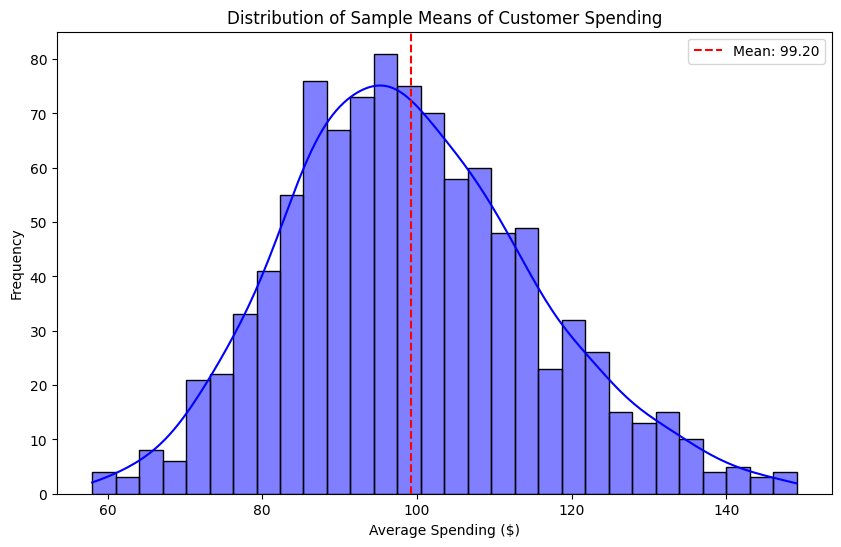

Mean of Sample Means: 99.20
Standard Deviation of Sample Means: 16.18


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating customer spending data with a skewed distribution
def generate_customer_spending(num_customers):
    # Assume an exponential distribution for spending
    return np.random.exponential(100, num_customers)

# Function to calculate sample means for CLT demonstration
def calculate_sample_means(data, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

# Parameters for the analysis
num_customers = 10000  # Total number of customers
sample_size = 40       # Number of samples in each mean calculation
num_samples = 1000     # Number of times the experiment is repeated

# Generating customer spending data
customer_spending = generate_customer_spending(num_customers)

# Calculating sample means based on the generated data
sample_means = calculate_sample_means(customer_spending, sample_size, num_samples)

# Visualizing the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='blue', bins=30)
plt.title('Distribution of Sample Means of Customer Spending')
plt.xlabel('Average Spending ($)')
plt.ylabel('Frequency')
plt.axvline(x=np.mean(sample_means), color='red', linestyle='--', label=f'Mean: {np.mean(sample_means):.2f}')
plt.legend()
plt.show()

# Interpreting the results
print(f"Mean of Sample Means: {np.mean(sample_means):.2f}")
print(f"Standard Deviation of Sample Means: {np.std(sample_means, ddof=1):.2f}")

# Additional Insights:
# - The distribution of sample means approximates a normal distribution, as predicted by the CLT.
# - This normal distribution has a mean close to the mean of the original skewed distribution of customer spending.
# - The spread (standard deviation) of this distribution provides insights into the variability of average customer spending.

In [96]:
#**Solution of the Messi's exercise:**
import random

N = 10000 # perform N experiments
M = 0 # no of times we get one 6
T = 42
Messi_score=0.83
Cristiano_score=0.62
success='1111111111'

for i in range(N):
    outcome=''
    for i in range(T):
        res=random.random()
        if res<Cristiano_score:
            outcome=outcome+'1'
        else: outcome=outcome+'0'

    if (success in outcome):
            M += 1

print('Cristiano got scores at least 1 goal in a row of 10 matches during a season %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

Cristiano got scores at least 1 goal in a row of 10 matches during a season 1046 times out of 10000 ; Prob =  0.1046
